# The Dream Team:

### Alphayo Nyarera, Matt Gilliland, John Flowers, Jorge Vivas, and Emilio Mantilla


#  

# H1-B Visa Application Success Model

# Table of contents
1. [Project](#project)
    1. [Importing Packages](#packages)
    2. [Reading Data](#read)
    3. [Exploratory Analysis - Pre Cleaning](#explore)
        - [General](#general)
        - [Case Status](#status)
        - [Top Employers Filing Petitions](#employers)
        - [Top Positions in Demands](#positions)
        - [Missing Values H-1B](#missing)
    4. [Data Cleaining & Feature Engineering](#engineering)
        - [Pre-selection of Features](#prefeatures)
        - [Prevailing Wage to Yearly Wage](#pwtoyearly)
        - [2015 Data Cleaning](#2015cleaning)
        - [2016 Data Cleaning](#2016cleaning)
        - [2017 Data Cleaning](#2017cleaning)
        - [2018 Data Cleaning](#2018cleaning)
        - [Final Data Cleaning - All Years](#AllCleaning)
        - [Drop Missing Values](#dropmissing)
        - [Feature Engineering](#othercleaning)
    5. [Exploratory Analysis - Post Cleaning](#postexplore)
    6. [Model Selection](#model)
        - [Data Pre-processing for Modelling](#preprocess)
            - [Label Encoder](#labencoder)
        - [Models](#models)
            - [Logistic Regression](#logreg)
            - [Decision Tree Classifier](#decisiontree)
            - [Random Forest](#randomforest)
            - [XGBoost](#xgboost)
            - [One-Class SVM](#OneClassSVM)
    7. [Conclusions](#conclusion)

# <u> Project</u> <a name="project"></a>

## A. Importing Packages: <a name="packages"></a>

In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

import matplotlib as mpl 
import sklearn
import sklearn.model_selection as cv
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal
from scipy.cluster.hierarchy import linkage

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from datetime import datetime

#from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from array import array

import warnings
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

## B. Reading Data: <a name="read"></a>

Our first attempt to load data as one dataset failed partly due to a memory error, but mainly due to different column names(data inconsistency), so we read the data separately. From here henceforth, we proceed to clean the data separately before joining it into one large dataframe

It is worth noting that this data is not related to the lottery process. This is data for people outside the lottery process, and those already selected via the lottery process:

In [139]:
df_15=pd.read_csv('H1B_FY15.csv', low_memory = False)
df_16=pd.read_csv('H1B_FY16.csv', low_memory = False)
df_17=pd.read_csv('H1B_FY17.csv', low_memory = False)
df_18=pd.read_csv('H1B_FY18.csv', low_memory = False)

## C. Exploratory Analysis - Pre Cleaning: <a name="explore"></a>

### - General:<a name="general"></a>

In [140]:
print(df_15.info(),'\n')
print(df_15.head(),'\n')
print(df_15.describe(),'\n')
print(df_15.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618804 entries, 0 to 618803
Data columns (total 40 columns):
CASE_NUMBER              618804 non-null object
CASE_STATUS              618804 non-null object
CASE_SUBMITTED           618804 non-null object
DECISION_DATE            618804 non-null object
VISA_CLASS               618804 non-null object
EMPLOYMENT_START_DATE    618785 non-null object
EMPLOYMENT_END_DATE      618785 non-null object
EMPLOYER_NAME            618781 non-null object
EMPLOYER_ADDRESS1        618778 non-null object
EMPLOYER_ADDRESS2        310861 non-null object
EMPLOYER_CITY            618773 non-null object
EMPLOYER_STATE           618761 non-null object
EMPLOYER_POSTAL_CODE     618766 non-null object
EMPLOYER_COUNTRY         618782 non-null object
EMPLOYER_PROVINCE        8760 non-null object
EMPLOYER_PHONE           618742 non-null float64
EMPLOYER_PHONE_EXT       38244 non-null float64
AGENT_ATTORNEY_NAME      391678 non-null object
AGENT_ATTORNEY_CITY      3

In [141]:
print(df_16.info(),'\n')
print(df_16.head(),'\n')
print(df_16.describe(),'\n')
print(df_16.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647852 entries, 0 to 647851
Data columns (total 40 columns):
CASE_NUMBER              647852 non-null object
CASE_STATUS              647852 non-null object
CASE_SUBMITTED           647852 non-null object
DECISION_DATE            647852 non-null object
VISA_CLASS               647852 non-null object
EMPLOYMENT_START_DATE    647835 non-null object
EMPLOYMENT_END_DATE      647827 non-null object
EMPLOYER_NAME            647837 non-null object
EMPLOYER_ADDRESS         647847 non-null object
EMPLOYER_CITY            647846 non-null object
EMPLOYER_STATE           647818 non-null object
EMPLOYER_POSTAL_CODE     647831 non-null object
EMPLOYER_COUNTRY         647849 non-null object
EMPLOYER_PROVINCE        7672 non-null object
EMPLOYER_PHONE           647849 non-null object
EMPLOYER_PHONE_EXT       34262 non-null object
AGENT_ATTORNEY_NAME      647852 non-null object
AGENT_ATTORNEY_CITY      406318 non-null object
AGENT_ATTORNEY_STATE     395

In [142]:
print(df_17.info(),'\n')
print(df_17.head(),'\n')
print(df_17.describe(),'\n')#print(df_17.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 52 columns):
CASE_NUMBER                    624650 non-null object
CASE_STATUS                    624650 non-null object
CASE_SUBMITTED                 624650 non-null object
DECISION_DATE                  624650 non-null object
VISA_CLASS                     624650 non-null object
EMPLOYMENT_START_DATE          624621 non-null object
EMPLOYMENT_END_DATE            624620 non-null object
EMPLOYER_NAME                  624594 non-null object
EMPLOYER_BUSINESS_DBA          43270 non-null object
EMPLOYER_ADDRESS               624643 non-null object
EMPLOYER_CITY                  624635 non-null object
EMPLOYER_STATE                 624632 non-null object
EMPLOYER_POSTAL_CODE           624632 non-null object
EMPLOYER_COUNTRY               528143 non-null object
EMPLOYER_PROVINCE              6116 non-null object
EMPLOYER_PHONE                 528142 non-null object
EMPLOYER_PHONE_EXT          

In [143]:
print(df_18.info(),'\n')
print(df_18.head(),'\n')
print(df_18.describe(),'\n')
print(df_18.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 52 columns):
CASE_NUMBER                    654360 non-null object
CASE_STATUS                    654360 non-null object
CASE_SUBMITTED                 654359 non-null object
DECISION_DATE                  654360 non-null object
VISA_CLASS                     654360 non-null object
EMPLOYMENT_START_DATE          654353 non-null object
EMPLOYMENT_END_DATE            654349 non-null object
EMPLOYER_NAME                  654341 non-null object
EMPLOYER_BUSINESS_DBA          53490 non-null object
EMPLOYER_ADDRESS               654349 non-null object
EMPLOYER_CITY                  654349 non-null object
EMPLOYER_STATE                 654287 non-null object
EMPLOYER_POSTAL_CODE           654342 non-null object
EMPLOYER_COUNTRY               654353 non-null object
EMPLOYER_PROVINCE              6705 non-null object
EMPLOYER_PHONE                 654353 non-null object
EMPLOYER_PHONE_EXT          

We review the columns that are common in all the four datasets:

In [144]:
set(df_15.columns).intersection(set(df_16.columns)).intersection(set(df_17.columns)).intersection(set(df_18.columns))

{'AGENT_ATTORNEY_CITY',
 'AGENT_ATTORNEY_NAME',
 'AGENT_ATTORNEY_STATE',
 'CASE_NUMBER',
 'CASE_STATUS',
 'CASE_SUBMITTED',
 'DECISION_DATE',
 'EMPLOYER_CITY',
 'EMPLOYER_COUNTRY',
 'EMPLOYER_NAME',
 'EMPLOYER_PHONE',
 'EMPLOYER_PHONE_EXT',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_PROVINCE',
 'EMPLOYER_STATE',
 'EMPLOYMENT_END_DATE',
 'EMPLOYMENT_START_DATE',
 'FULL_TIME_POSITION',
 'JOB_TITLE',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'SOC_CODE',
 'SOC_NAME',
 'VISA_CLASS',
 'WAGE_UNIT_OF_PAY',
 'WORKSITE_CITY',
 'WORKSITE_COUNTY',
 'WORKSITE_POSTAL_CODE',
 'WORKSITE_STATE'}

In [145]:
print('2015 Data:\n',df_15['VISA_CLASS'].value_counts(),'\n')
print('2016 Data:\n',df_16['VISA_CLASS'].value_counts(),'\n')
print('2017 Data:\n',df_17['VISA_CLASS'].value_counts(),'\n')
print('2018 Data:\n',df_18['VISA_CLASS'].value_counts())

2015 Data:
 H-1B               605803
E-3 Australian      11185
H-1B1 Singapore      1074
H-1B1 Chile           742
Name: VISA_CLASS, dtype: int64 

2016 Data:
 H-1B                          633943
E-3 Australian                 11934
H-1B1 Singapore                 1099
H-1B1 Chile                      875
Select Visa Classification         1
Name: VISA_CLASS, dtype: int64 

2017 Data:
 H-1B               610304
E-3 Australian      12157
H-1B1 Singapore      1254
H-1B1 Chile           935
Name: VISA_CLASS, dtype: int64 

2018 Data:
 H-1B               639519
E-3 Australian      12566
H-1B1 Singapore      1267
H-1B1 Chile          1008
Name: VISA_CLASS, dtype: int64


### <u>Notes:</u>
#### -We identified different numbers of features from each file (40 columns in FY15 and FY16, and 52 columns for FY17 and FY18).
#### -We noticed some of the feature names are not consistent, so we will need to replace their names.
#### -We will have to remove irrelevant features, and perform significant feature engineering to the data before we design the models.
#### -We noticed the data contains different visa classes, however we are only using "H-1B" cases for our project so we selected for it


### - Case Status:<a name="status"></a>

In [146]:
df_15_h1b=df_15.loc[df_15['VISA_CLASS'] == 'H-1B']
df_16_h1b=df_16.loc[df_16['VISA_CLASS'] == 'H-1B']
df_17_h1b=df_17.loc[df_17['VISA_CLASS'] == 'H-1B']
df_18_h1b=df_18.loc[df_18['VISA_CLASS'] == 'H-1B']

Our new datasets have the following breakdown:

In [147]:
print('2015 Data:\n',df_15_h1b['CASE_STATUS'].value_counts(),'\n')
print('2016 Data:\n',df_16_h1b['CASE_STATUS'].value_counts(),'\n')
print('2017 Data:\n',df_17_h1b['CASE_STATUS'].value_counts(),'\n')
print('2018 Data:\n',df_18_h1b['CASE_STATUS'].value_counts())

2015 Data:
 CERTIFIED              536693
CERTIFIED-WITHDRAWN     40368
WITHDRAWN               19039
DENIED                   9703
Name: CASE_STATUS, dtype: int64 

2016 Data:
 CERTIFIED              558014
CERTIFIED-WITHDRAWN     46294
WITHDRAWN               21432
DENIED                   8203
Name: CASE_STATUS, dtype: int64 

2017 Data:
 CERTIFIED              533621
CERTIFIED-WITHDRAWN     48880
WITHDRAWN               20322
DENIED                   7481
Name: CASE_STATUS, dtype: int64 

2018 Data:
 CERTIFIED              567011
CERTIFIED-WITHDRAWN     44145
WITHDRAWN               20826
DENIED                   7537
Name: CASE_STATUS, dtype: int64


### <u>Notes:</u>
#### -For CASE STATUS, we noticed there is a pattern each year were the majority of the cases would be certified.
We visualize the class breakdown for the H1B acceptance and denial. As you can see, there is a huge skew towards acceptances. This is the same across all years as shown below 




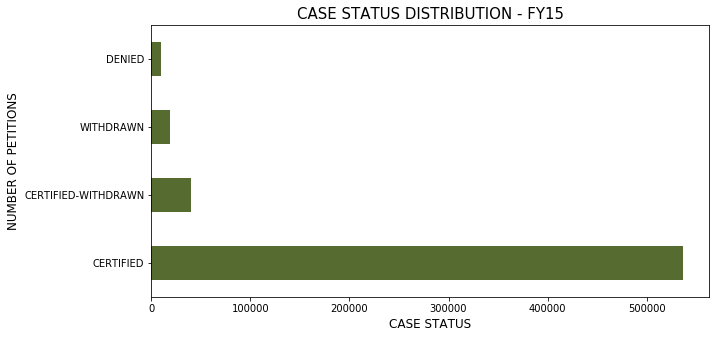

CERTIFIED              536693
CERTIFIED-WITHDRAWN     40368
WITHDRAWN               19039
DENIED                   9703
Name: CASE_STATUS, dtype: int64 

TOTAL NUMBER OF PETITIONS: 605,803


In [148]:
plot_status_numberinit = df_15_h1b['CASE_STATUS'].value_counts().plot(kind = 'barh', color = 'darkolivegreen', figsize=(10,5), fontsize=10)
plot_status_numberinit.set_title('CASE STATUS DISTRIBUTION - FY15', fontsize=15)
plot_status_numberinit.set_xlabel("CASE STATUS", fontsize=12)
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS", fontsize=12)
plt.show()
print(df_15_h1b['CASE_STATUS'].value_counts(),'\n')
count15=df_15_h1b['CASE_STATUS'].value_counts()
print('TOTAL NUMBER OF PETITIONS: {:,}'.format(sum(count15)))

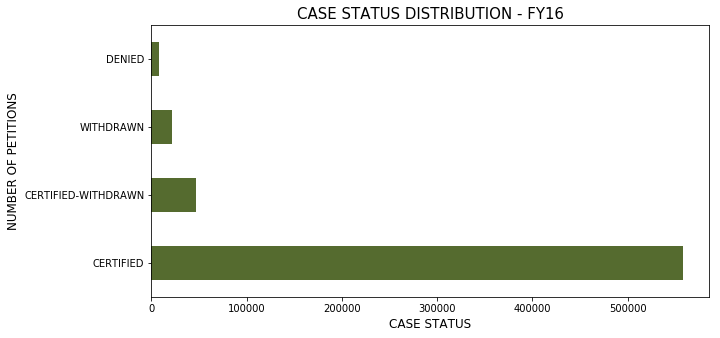

CERTIFIED              558014
CERTIFIED-WITHDRAWN     46294
WITHDRAWN               21432
DENIED                   8203
Name: CASE_STATUS, dtype: int64 

TOTAL NUMBER OF PETITIONS: 633,943


In [149]:
plot_status_numberinit = df_16_h1b['CASE_STATUS'].value_counts().plot(kind = 'barh', color = 'darkolivegreen', figsize=(10,5), fontsize=10)
plot_status_numberinit.set_title('CASE STATUS DISTRIBUTION - FY16', fontsize=15)
plot_status_numberinit.set_xlabel("CASE STATUS", fontsize=12)
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS", fontsize=12)
plt.show()
print(df_16_h1b['CASE_STATUS'].value_counts(),'\n')
count16=df_16_h1b['CASE_STATUS'].value_counts()
print('TOTAL NUMBER OF PETITIONS: {:,}'.format(sum(count16)))

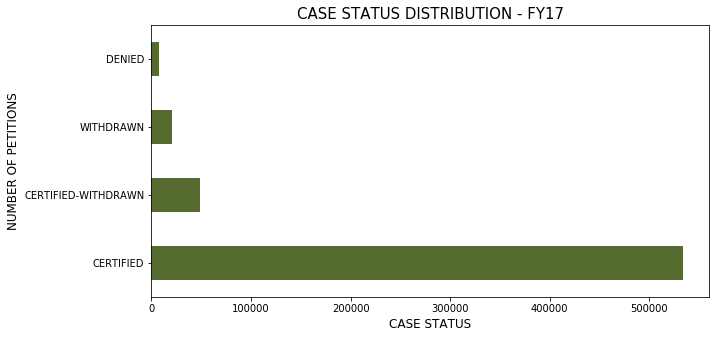

CERTIFIED              533621
CERTIFIED-WITHDRAWN     48880
WITHDRAWN               20322
DENIED                   7481
Name: CASE_STATUS, dtype: int64 

TOTAL NUMBER OF PETITIONS: 610,304


In [150]:
plot_status_numberinit = df_17_h1b['CASE_STATUS'].value_counts().plot(kind = 'barh', color = 'darkolivegreen', figsize=(10,5), fontsize=10)
plot_status_numberinit.set_title('CASE STATUS DISTRIBUTION - FY17', fontsize=15)
plot_status_numberinit.set_xlabel("CASE STATUS", fontsize=12)
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS", fontsize=12)
plt.show()
print(df_17_h1b['CASE_STATUS'].value_counts(),'\n')
count17=df_17_h1b['CASE_STATUS'].value_counts()
print('TOTAL NUMBER OF PETITIONS: {:,}'.format(sum(count17)))

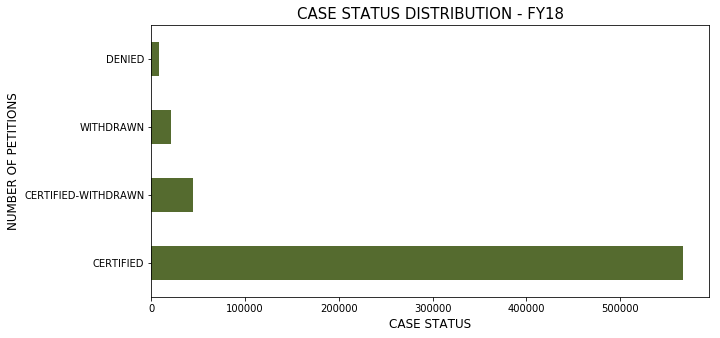

CERTIFIED              567011
CERTIFIED-WITHDRAWN     44145
WITHDRAWN               20826
DENIED                   7537
Name: CASE_STATUS, dtype: int64 

TOTAL NUMBER OF PETITIONS: 639,519


In [151]:
plot_status_numberinit = df_18_h1b['CASE_STATUS'].value_counts().plot(kind = 'barh', color = 'darkolivegreen', figsize=(10,5), fontsize=10)
plot_status_numberinit.set_title('CASE STATUS DISTRIBUTION - FY18', fontsize=15)
plot_status_numberinit.set_xlabel("CASE STATUS", fontsize=12)
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS", fontsize=12)
plt.show()
print(df_18_h1b['CASE_STATUS'].value_counts(),'\n')
count18=df_18_h1b['CASE_STATUS'].value_counts()
print('TOTAL NUMBER OF PETITIONS: {:,}'.format(sum(count18)))

Despite the relative large number of acceptances, we see a drop in the 2017 applications. The drop is relatively smallWe interpret this to be a result of the po

In [152]:
my_list=[sum(count15),sum(count16),sum(count17),sum(count18)]
df = pd.DataFrame(np.array(my_list))
print(df)

        0
0  605803
1  633943
2  610304
3  639519


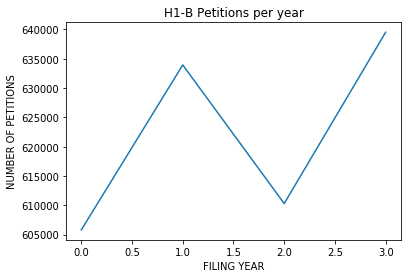

In [153]:
df = df.plot(title = 'H1-B Petitions per year', kind = 'line', legend=False)
df.set_xlabel('FILING YEAR')
df.set_ylabel('NUMBER OF PETITIONS')
plt.show()

## - Top Employers filing petitions:<a name="employers"></a>

### <u>Notes:</u>
#### -We see most of the same employers in the top 10 employers filing petitions each year. However, some years employers file more petitions than others.
#### -Comparing Top 10 employers petitions with the number of petitions certified, both look very similar since we already found the certified rate is very high and that the status follow a pattern.

#### -What we see over the years is that the distribution of applications among top 10 employers filing applications gets more balanced.

INFOSYS LIMITED                      33233
TATA CONSULTANCY SERVICES LIMITED    16562
WIPRO LIMITED                        12180
IBM INDIA PRIVATE LIMITED            10693
ACCENTURE LLP                         9600
DELOITTE CONSULTING LLP               7567
HCL AMERICA, INC.                     6098
IGATE TECHNOLOGIES INC.               4547
MICROSOFT CORPORATION                 4447
ERNST & YOUNG U.S. LLP                4066
Name: EMPLOYER_NAME, dtype: int64


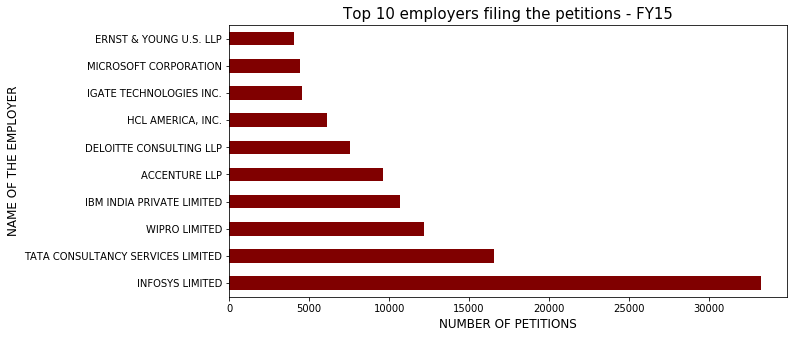

In [154]:
plot_status_topemp= df_15_h1b['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'maroon', figsize = (10, 5))
plot_status_topemp.set_title("Top 10 employers filing the petitions - FY15", fontsize=15)
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp
print(df_15_h1b['EMPLOYER_NAME'].value_counts().head(10))

INFOSYS LIMITED                                    25327
CAPGEMINI AMERICA INC                              16719
TATA CONSULTANCY SERVICES LIMITED                  13134
WIPRO LIMITED                                      10598
IBM INDIA PRIVATE LIMITED                           9786
ACCENTURE LLP                                       9446
DELOITTE CONSULTING LLP                             7590
TECH MAHINDRA (AMERICAS),INC.                       6742
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     5301
HCL AMERICA, INC.                                   4917
Name: EMPLOYER_NAME, dtype: int64


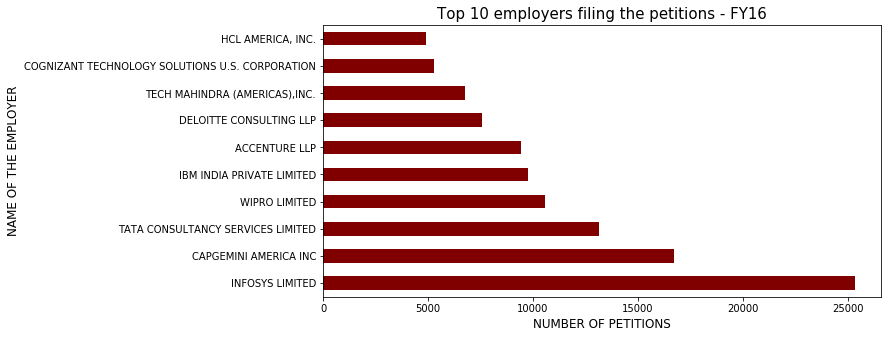

In [155]:
plot_status_topemp= df_16_h1b['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'maroon', figsize = (10, 5))
plot_status_topemp.set_title("Top 10 employers filing the petitions - FY16", fontsize=15)
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp
print(df_16_h1b['EMPLOYER_NAME'].value_counts().head(10))

INFOSYS LIMITED                      20558
TATA CONSULTANCY SERVICES LIMITED    13528
CAPGEMINI AMERICA INC                 9595
IBM INDIA PRIVATE LIMITED             8734
TECH MAHINDRA (AMERICAS),INC.         7543
DELOITTE CONSULTING LLP               7121
ACCENTURE LLP                         6671
ERNST & YOUNG U.S. LLP                5953
WIPRO LIMITED                         5163
GOOGLE INC.                           4909
Name: EMPLOYER_NAME, dtype: int64


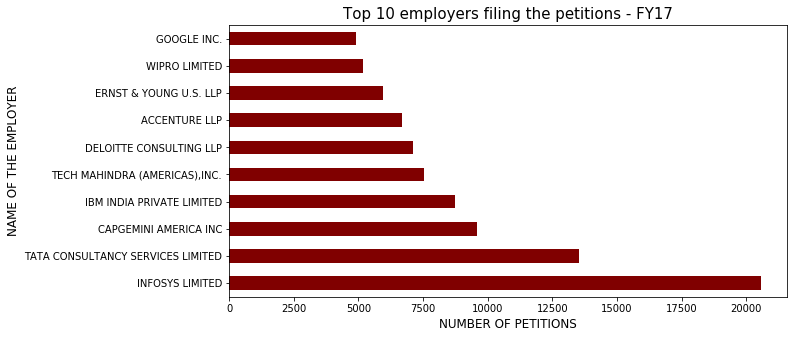

In [156]:
plot_status_topemp= df_17_h1b['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'maroon', figsize = (10, 5))
plot_status_topemp.set_title("Top 10 employers filing the petitions - FY17", fontsize=15)
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp
print(df_17_h1b['EMPLOYER_NAME'].value_counts().head(10))

DELOITTE CONSULTING LLP                   16004
TATA CONSULTANCY SERVICES LIMITED         14600
INFOSYS LIMITED                           11560
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    11074
ERNST & YOUNG U.S. LLP                     6812
ACCENTURE LLP                              6341
WIPRO LIMITED                              6294
CAPGEMINI AMERICA INC                      6058
GOOGLE LLC                                 5920
TECH MAHINDRA (AMERICAS),INC.              5835
Name: EMPLOYER_NAME, dtype: int64


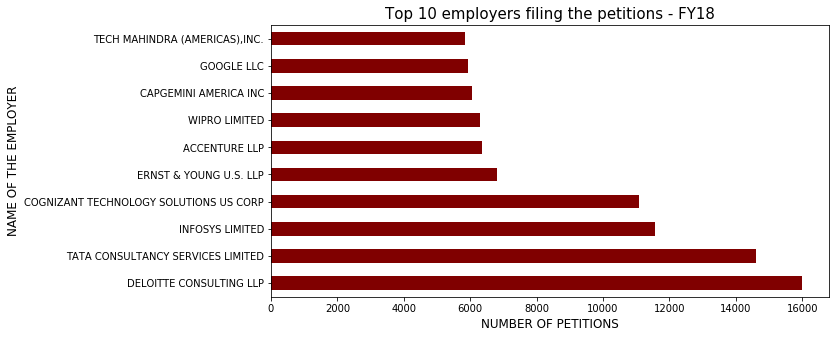

In [157]:
plot_status_topemp= df_18_h1b['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'maroon', figsize = (10, 5))
plot_status_topemp.set_title("Top 10 employers filing the petitions - FY18", fontsize=15)
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp
print(df_18_h1b['EMPLOYER_NAME'].value_counts().head(10))

#### - Now, lets take a look to the top employers with "CERTIFIED" petitions: A quick review shows that most of them are in the technology and professional services sector across all years

In [158]:
df_15_h1b_cert=df_15_h1b.loc[df_15_h1b['CASE_STATUS'] == 'CERTIFIED']
df_16_h1b_cert=df_16_h1b.loc[df_16_h1b['CASE_STATUS'] == 'CERTIFIED']
df_17_h1b_cert=df_17_h1b.loc[df_17_h1b['CASE_STATUS'] == 'CERTIFIED']
df_18_h1b_cert=df_18_h1b.loc[df_18_h1b['CASE_STATUS'] == 'CERTIFIED']

INFOSYS LIMITED                      33204
TATA CONSULTANCY SERVICES LIMITED    16435
WIPRO LIMITED                        10499
ACCENTURE LLP                         9467
IBM INDIA PRIVATE LIMITED             9027
DELOITTE CONSULTING LLP               7474
HCL AMERICA, INC.                     6087
IGATE TECHNOLOGIES INC.               4395
ERNST & YOUNG U.S. LLP                4041
MICROSOFT CORPORATION                 3726
Name: EMPLOYER_NAME, dtype: int64


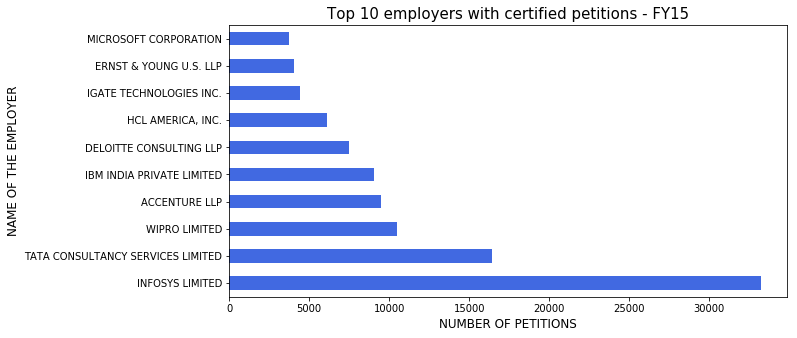

In [159]:
plot_status_topemp_cert= df_15_h1b_cert['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'royalblue', figsize = (10, 5))
plot_status_topemp_cert.set_title("Top 10 employers with certified petitions - FY15", fontsize=15)
plot_status_topemp_cert.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp_cert.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp_cert
print(df_15_h1b_cert['EMPLOYER_NAME'].value_counts().head(10))

INFOSYS LIMITED                      25296
CAPGEMINI AMERICA INC                15952
TATA CONSULTANCY SERVICES LIMITED    13072
WIPRO LIMITED                         9520
ACCENTURE LLP                         9343
IBM INDIA PRIVATE LIMITED             7823
DELOITTE CONSULTING LLP               7448
TECH MAHINDRA (AMERICAS),INC.         6677
HCL AMERICA, INC.                     4903
MICROSOFT CORPORATION                 4544
Name: EMPLOYER_NAME, dtype: int64


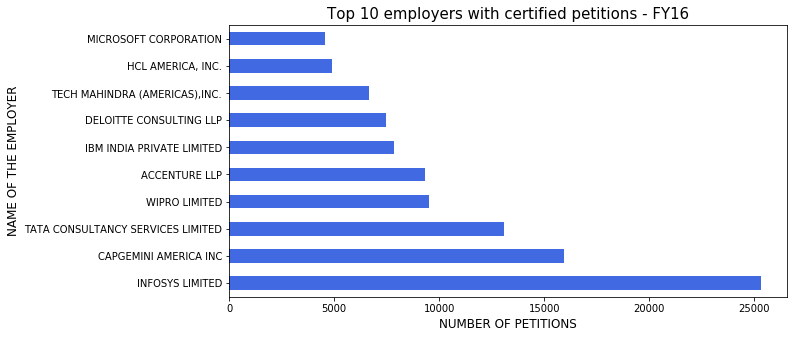

In [160]:
plot_status_topemp_cert= df_16_h1b_cert['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'royalblue', figsize = (10, 5))
plot_status_topemp_cert.set_title("Top 10 employers with certified petitions - FY16", fontsize=15)
plot_status_topemp_cert.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp_cert.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp_cert
print(df_16_h1b_cert['EMPLOYER_NAME'].value_counts().head(10))

INFOSYS LIMITED                      20536
TATA CONSULTANCY SERVICES LIMITED    13428
CAPGEMINI AMERICA INC                 8861
TECH MAHINDRA (AMERICAS),INC.         7515
IBM INDIA PRIVATE LIMITED             7273
DELOITTE CONSULTING LLP               6922
ACCENTURE LLP                         6613
ERNST & YOUNG U.S. LLP                5863
WIPRO LIMITED                         4534
MICROSOFT CORPORATION                 4307
Name: EMPLOYER_NAME, dtype: int64


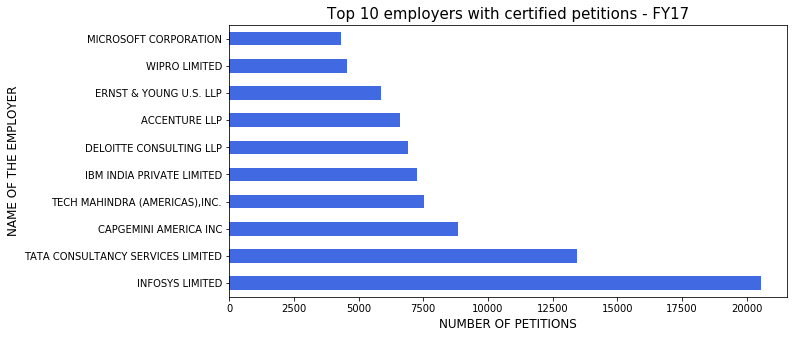

In [161]:
plot_status_topemp_cert= df_17_h1b_cert['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'royalblue', figsize = (10, 5))
plot_status_topemp_cert.set_title("Top 10 employers with certified petitions - FY17", fontsize=15)
plot_status_topemp_cert.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp_cert.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp_cert
print(df_17_h1b_cert['EMPLOYER_NAME'].value_counts().head(10))

DELOITTE CONSULTING LLP                   15596
TATA CONSULTANCY SERVICES LIMITED         14489
INFOSYS LIMITED                           11547
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    10189
ERNST & YOUNG U.S. LLP                     6760
ACCENTURE LLP                              6092
WIPRO LIMITED                              6077
TECH MAHINDRA (AMERICAS),INC.              5831
CAPGEMINI AMERICA INC                      5594
MICROSOFT CORPORATION                      5417
Name: EMPLOYER_NAME, dtype: int64


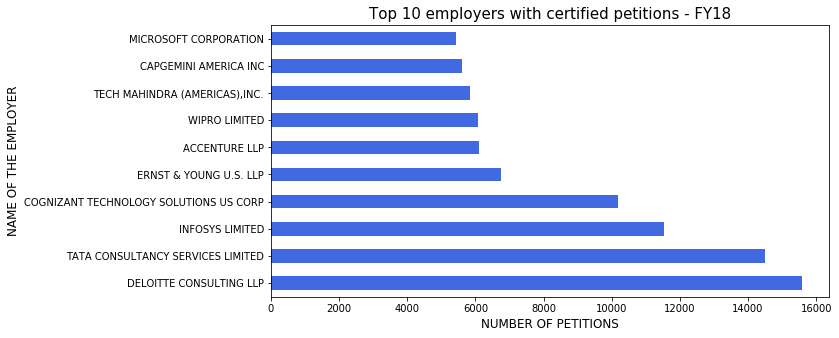

In [162]:
plot_status_topemp_cert= df_18_h1b_cert['EMPLOYER_NAME'].value_counts().head(10).plot.barh(color = 'royalblue', figsize = (10, 5))
plot_status_topemp_cert.set_title("Top 10 employers with certified petitions - FY18", fontsize=15)
plot_status_topemp_cert.set_ylabel("NAME OF THE EMPLOYER", fontsize=12)
plot_status_topemp_cert.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topemp_cert
print(df_18_h1b_cert['EMPLOYER_NAME'].value_counts().head(10))

## - Top Positions in demand:<a name="positions"></a>


### <u>Notes:</u>
#### -We now review the top positions that have pending H1B visa applicationsFor SOCs positions, we see a very stable pattern for most demanded positions.
#### -However, we noticed some inconsistency with the names. i.e. we see two groups for "COMPUTER SYSTEMS ANALYST" and "COMPUTER SYSTEMS ANALYSTS". 
#### -We also noticed that most of the positions are of tech-related fields, therefore we might consider grouping them into more general fields for better comparison with other fields. 

COMPUTER SYSTEMS ANALYSTS                      115984
SOFTWARE DEVELOPERS, APPLICATIONS               99395
COMPUTER PROGRAMMERS                            89868
COMPUTER OCCUPATIONS, ALL OTHER                 54304
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           17307
MANAGEMENT ANALYSTS                             12702
ACCOUNTANTS AND AUDITORS                        10474
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     10392
FINANCIAL ANALYSTS                               9262
DATABASE ADMINISTRATORS                          8252
Name: SOC_NAME, dtype: int64


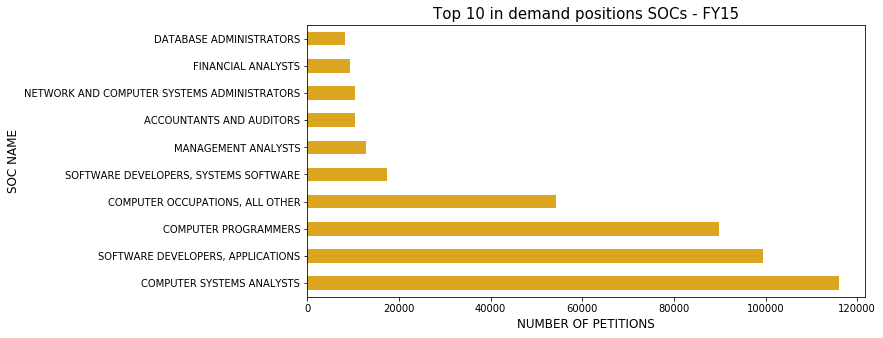

In [163]:
plot_status_topsoc= df_15_h1b['SOC_NAME'].value_counts().head(10).plot.barh(color = 'goldenrod', figsize = (10, 5))
plot_status_topsoc.set_title("Top 10 in demand positions SOCs - FY15", fontsize=15)
plot_status_topsoc.set_ylabel("SOC NAME", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topsoc
print(df_15_h1b['SOC_NAME'].value_counts().head(10))

SOFTWARE DEVELOPERS, APPLICATIONS              120007
COMPUTER SYSTEMS ANALYSTS                       98033
COMPUTER PROGRAMMERS                            81540
COMPUTER OCCUPATIONS, ALL OTHER                 53491
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           21611
COMPUTER SYSTEMS ANALYST                        16801
MANAGEMENT ANALYSTS                             14542
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     11004
ACCOUNTANTS AND AUDITORS                        10780
MECHANICAL ENGINEERS                             9419
Name: SOC_NAME, dtype: int64


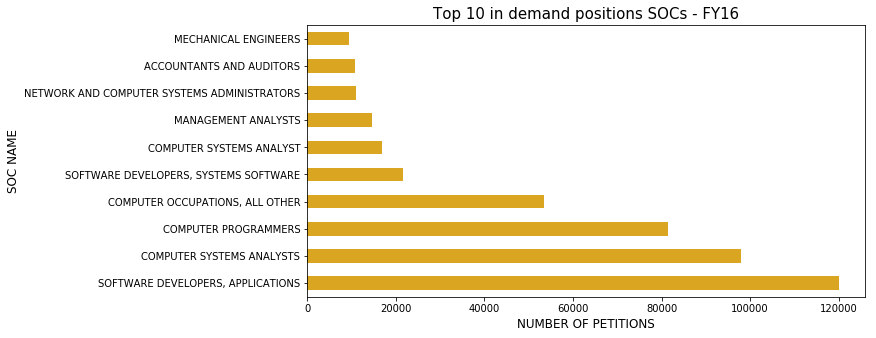

In [164]:
plot_status_topsoc= df_16_h1b['SOC_NAME'].value_counts().head(10).plot.barh(color = 'goldenrod', figsize = (10, 5))
plot_status_topsoc.set_title("Top 10 in demand positions SOCs - FY16", fontsize=15)
plot_status_topsoc.set_ylabel("SOC NAME", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topsoc
print(df_16_h1b['SOC_NAME'].value_counts().head(10))

SOFTWARE DEVELOPERS, APPLICATIONS              123191
COMPUTER SYSTEMS ANALYSTS                       93005
COMPUTER PROGRAMMERS                            66423
COMPUTER OCCUPATIONS, ALL OTHER                 52984
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           18172
COMPUTER SYSTEMS ANALYST                        16881
MANAGEMENT ANALYSTS                             12636
ACCOUNTANTS AND AUDITORS                        11385
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     10706
MECHANICAL ENGINEERS                             9710
Name: SOC_NAME, dtype: int64


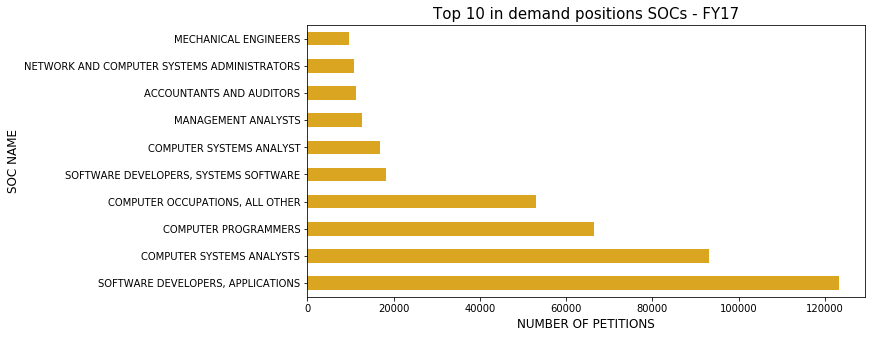

In [165]:
plot_status_topsoc= df_17_h1b['SOC_NAME'].value_counts().head(10).plot.barh(color = 'goldenrod', figsize = (10, 5))
plot_status_topsoc.set_title("Top 10 in demand positions SOCs - FY17", fontsize=15)
plot_status_topsoc.set_ylabel("SOC NAME", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topsoc
print(df_17_h1b['SOC_NAME'].value_counts().head(10))

SOFTWARE DEVELOPERS, APPLICATIONS        193010
COMPUTER OCCUPATIONS, ALL OTHER           60491
COMPUTER SYSTEMS ANALYSTS                 59533
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     26853
COMPUTER PROGRAMMERS                      26598
COMPUTER SYSTEMS ANALYST                  14223
OPERATIONS RESEARCH ANALYSTS              13130
MANAGEMENT ANALYSTS                       12384
ACCOUNTANTS AND AUDITORS                  10781
MECHANICAL ENGINEERS                      10714
Name: SOC_NAME, dtype: int64


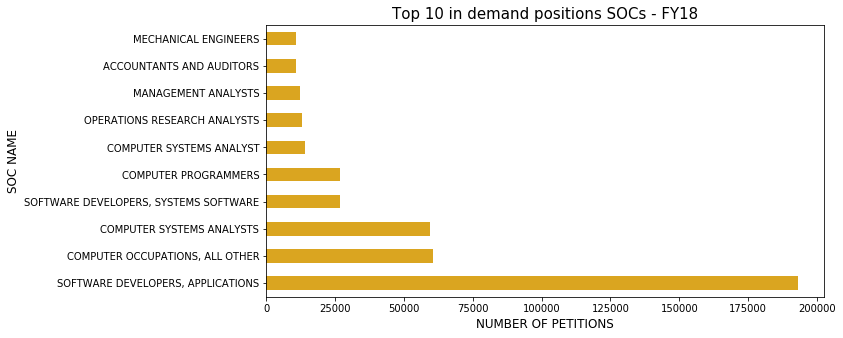

In [166]:
plot_status_topsoc= df_18_h1b['SOC_NAME'].value_counts().head(10).plot.barh(color = 'goldenrod', figsize = (10, 5))
plot_status_topsoc.set_title("Top 10 in demand positions SOCs - FY18", fontsize=15)
plot_status_topsoc.set_ylabel("SOC NAME", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topsoc
print(df_18_h1b['SOC_NAME'].value_counts().head(10))

## - Missing Values H-1B:<a name="missing"></a>
#### -We can see that some features in the different datasets have 100% of the data, but others have high percentages of missing values. For specific cases we will have to fill the missing values, for others we will simply drop the columns.
#### We are going to handle all the missing data in the files for all the years

#### -FY15:

In [167]:
# get the number of missing data points per column
missing_values_count = df_15_h1b.isnull().sum().sort_values(ascending=False)

percent_1 = df_15_h1b.isnull().sum()/df_15_h1b.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)

missing_data = pd.concat([missing_values_count,percent_2],axis='columns',keys=['Total','%'],sort=False)

# look at the # of missing points in the first ten columns
missing_data

,Total,%
EMPLOYER_PROVINCE,597190,98.6
EMPLOYER_PHONE_EXT,568119,93.8
EMPLOYER_ADDRESS2,300137,49.5
AGENT_ATTORNEY_STATE,230685,38.1
AGENT_ATTORNEY_CITY,223134,36.8
AGENT_ATTORNEY_NAME,223132,36.8
PW_WAGE_LEVEL,27961,4.6
PW_WAGE_SOURCE_OTHER,9780,1.6
WORKSITE_COUNTY,1341,0.2
PW_WAGE_SOURCE_YEAR,63,0.0


#### -FY16:

In [168]:
# get the number of missing data points per column
missing_values_count = df_16_h1b.isnull().sum().sort_values(ascending=False)

percent_1 = df_16_h1b.isnull().sum()/df_16_h1b.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)

missing_data = pd.concat([missing_values_count,percent_2],axis='columns',keys=['Total','%'],sort=False)

# look at the # of missing points in the first ten columns
missing_data

,Total,%
FULL_TIME_POSITION,633943,100.0
EMPLOYER_PROVINCE,626399,98.8
EMPLOYER_PHONE_EXT,600251,94.7
ORIGINAL_CERT_DATE,587649,92.7
AGENT_ATTORNEY_STATE,247496,39.0
AGENT_ATTORNEY_CITY,237554,37.5
PW_SOURCE_OTHER,7841,1.2
WORKSITE_COUNTY,1283,0.2
PW_SOURCE_YEAR,49,0.0
PW_WAGE_SOURCE,42,0.0


#### -FY17:

In [169]:
# get the number of missing data points per column
missing_values_count = df_17_h1b.isnull().sum().sort_values(ascending=False)

percent_1 = df_17_h1b.isnull().sum()/df_17_h1b.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)

missing_data = pd.concat([missing_values_count,percent_2],axis='columns',keys=['Total','%'],sort=False)

# look at the # of missing points in the first ten columns
missing_data

,Total,%
PUBLIC_DISCLOSURE_LOCATION,610304,100.0
EMPLOYER_PROVINCE,604300,99.0
EMPLOYER_PHONE_EXT,582838,95.5
EMPLOYER_BUSINESS_DBA,568667,93.2
ORIGINAL_CERT_DATE,561420,92.0
SUPPORT_H1B,369872,60.6
LABOR_CON_AGREE,365720,59.9
AGENT_ATTORNEY_STATE,281594,46.1
AGENT_ATTORNEY_CITY,266807,43.7
PW_WAGE_LEVEL,119458,19.6


#### -FY18:

In [170]:
# get the number of missing data points per column
missing_values_count = df_18_h1b.isnull().sum().sort_values(ascending=False)

percent_1 = df_18_h1b.isnull().sum()/df_18_h1b.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)

missing_data = pd.concat([missing_values_count,percent_2],axis='columns',keys=['Total','%'],sort=False)

# look at the # of missing points in the first ten columns
missing_data

,Total,%
PUBLIC_DISCLOSURE_LOCATION,639519,100.0
EMPLOYER_PROVINCE,632968,99.0
EMPLOYER_PHONE_EXT,605934,94.7
ORIGINAL_CERT_DATE,595404,93.1
EMPLOYER_BUSINESS_DBA,588320,92.0
SUPPORT_H1B,406048,63.5
LABOR_CON_AGREE,404087,63.2
AGENT_ATTORNEY_STATE,216434,33.8
AGENT_ATTORNEY_CITY,191484,29.9
PW_WAGE_LEVEL,37194,5.8


## D.  Data Cleaning & Feature Engineering: <a name="engineering"></a>

### - Pre-selection of Features:<a name="prefeatures"></a>

#### -We can see that some features in the different datasets have 100% or other high percentages of missing values, for specific cases we will have to fill the missing values, for others we will simply drop the columns. 

#### -One of the features we pre-select is Prevailing Wage, which seems to have values representing different formats (yearly, monthly, weekly, bi-weekly, etc.). For that reason, we decided to create a new column converting these values into one single format (yearly). We did this for every year.

In [171]:
df_15_sub = df_15[['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS','EMPLOYMENT_START_DATE'
               ,'EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY'
               ,'SOC_CODE','SOC_NAME','NAIC_CODE','TOTAL WORKERS','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY',
              'PW_WAGE_SOURCE','PW_WAGE_SOURCE_YEAR','WAGE_RATE_OF_PAY','WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT'
               ,'WILLFUL VIOLATOR','WORKSITE_STATE','WORKSITE_POSTAL_CODE' ]]

In [172]:
df_15_sub.rename(columns={'NAIC_CODE':'NAICS_CODE',
                        'TOTAL WORKERS':'TOTAL_WORKERS', 
                        'PW_WAGE_SOURCE' :'PW_WAGE_SOURCE',
                        'PW_WAGE_SOURCE_YEAR':'PW_WAGE_SOURCE_YEAR',
                          'H-1B_DEPENDENT':'H1B_DEPENDENT',
                          'WILLFUL VIOLATOR':'WILLFUL_VIOLATOR'}, 
                 inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [173]:
df_16_sub = df_16[['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS','EMPLOYMENT_START_DATE'
               ,'EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY'
               ,'SOC_CODE','SOC_NAME','NAIC_CODE','TOTAL_WORKERS','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY',
              'PW_WAGE_SOURCE','PW_SOURCE_YEAR','WAGE_RATE_OF_PAY_FROM','WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT'
               ,'WILLFUL_VIOLATOR','WORKSITE_STATE','WORKSITE_POSTAL_CODE' ]]


In [174]:
df_16_sub.rename(columns={'NAIC_CODE':'NAICS_CODE',
                        'TOTAL_WORKERS':'TOTAL_WORKERS', 
                        'PW_WAGE_SOURCE' :'PW_WAGE_SOURCE',
                         'WAGE_RATE_OF_PAY_FROM':'WAGE_RATE_OF_PAY', 
                        'PW_SOURCE_YEAR':'PW_WAGE_SOURCE_YEAR',
                          'H-1B_DEPENDENT':'H1B_DEPENDENT',
                          'WILLFUL_VIOLATOR':'WILLFUL_VIOLATOR'}, 
                 inplace=True)

In [175]:
df_17_sub = df_17[['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS','EMPLOYMENT_START_DATE'
               ,'EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY'
               ,'SOC_CODE','SOC_NAME','NAICS_CODE','TOTAL_WORKERS','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY',
              'PW_SOURCE','PW_SOURCE_YEAR','WAGE_RATE_OF_PAY_FROM','WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT'
               ,'WILLFUL_VIOLATOR','WORKSITE_STATE','WORKSITE_POSTAL_CODE' ]]

In [176]:
df_17_sub.rename(columns={'NAICS_CODE':'NAICS_CODE',
                        'TOTAL_WORKERS':'TOTAL_WORKERS', 
                        'PW_SOURCE' :'PW_WAGE_SOURCE',
                          'WAGE_RATE_OF_PAY_FROM':'WAGE_RATE_OF_PAY', 
                        'PW_SOURCE_YEAR':'PW_WAGE_SOURCE_YEAR',
                          'H1B_DEPENDENT':'H1B_DEPENDENT',
                          'WILLFUL_VIOLATOR':'WILLFUL_VIOLATOR'}, 
                 inplace=True)

In [177]:
df_18_sub = df_18[['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS','EMPLOYMENT_START_DATE'
               ,'EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY'
               ,'SOC_CODE','SOC_NAME','NAICS_CODE','TOTAL_WORKERS','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY',
              'PW_SOURCE','PW_SOURCE_YEAR','WAGE_RATE_OF_PAY_FROM','WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT'
               ,'WILLFUL_VIOLATOR','WORKSITE_STATE','WORKSITE_POSTAL_CODE' ]]

In [178]:
df_18_sub.rename(columns={'NAICS_CODE':'NAICS_CODE',
                        'TOTAL_WORKERS':'TOTAL_WORKERS', 
                        'PW_SOURCE' :'PW_WAGE_SOURCE',
                        'PW_SOURCE_YEAR':'PW_WAGE_SOURCE_YEAR',
                          'WAGE_RATE_OF_PAY_FROM':'WAGE_RATE_OF_PAY', 
                          'H1B_DEPENDENT':'H1B_DEPENDENT',
                          'WILLFUL_VIOLATOR':'WILLFUL_VIOLATOR'}, 
                 inplace=True)

## Year - Specific Cleaning:
#### Some of the years need to be cleaned individually instead of as a whole due to specific peculiarities within each year 

## - 2015 Data Cleaning:<a name="2015cleaning"></a>
### <u>Notes:</u>
#### -For FY15, there are significant missing values for "H1B_DEPENDENT" and "WILLFUL_VIOLATOR". However, we noticed that when filtering the data for H-1B visa class most of those missing values were gone. 
#### - We will later work on the rest of the missing values.

## - 2016 Data Cleaning:<a name="2016cleaning"></a>

### <u>Notes:</u>
#### -Similar to FY15, we took care of most of the missing values for "H1B_DEPENDENT" and "WILLFUL_VIOLATOR" by filtering the data for H-1B visa class.
#### -For "FULL_TIME_POSITION", we filled the missing values by assigning a "Y" for yes and a "N" for no considering the "WAGE_UNIT_OF_PAY"(WUoP) feature. By this, all observations with WUoP that are equal to Year will be considered Full Time, and the rest will not be considered Full Time.
#### -We will later work on the rest of the missing values.

In [179]:
df_16_sub.isnull().sum()

CASE_NUMBER                   0
CASE_STATUS                   0
CASE_SUBMITTED                0
DECISION_DATE                 0
VISA_CLASS                    0
EMPLOYMENT_START_DATE        17
EMPLOYMENT_END_DATE          25
EMPLOYER_NAME                15
EMPLOYER_STATE               34
EMPLOYER_POSTAL_CODE         21
EMPLOYER_COUNTRY              3
SOC_CODE                      8
SOC_NAME                      8
NAICS_CODE                    5
TOTAL_WORKERS                 0
FULL_TIME_POSITION       647852
PREVAILING_WAGE               1
PW_UNIT_OF_PAY               49
PW_WAGE_SOURCE               53
PW_WAGE_SOURCE_YEAR          61
WAGE_RATE_OF_PAY              0
WAGE_UNIT_OF_PAY             10
H1B_DEPENDENT             13272
WILLFUL_VIOLATOR          13273
WORKSITE_STATE               10
WORKSITE_POSTAL_CODE         32
dtype: int64

In [180]:
#fill the column values depending on the "wage unit of pay"
df_16_sub['FULL_TIME_POSITION'].loc[df_16_sub['WAGE_UNIT_OF_PAY'] != 'Year'] = 'N'
df_16_sub['FULL_TIME_POSITION'].loc[df_16_sub['WAGE_UNIT_OF_PAY'] == 'Year'] = 'Y'
                                    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## - 2017 Data Cleaning:<a name="2017cleaning"></a>

### <u>Notes:</u>
#### -Similar to FY15 and FY16, we took care of most of the missing values for "H1B_DEPENDENT" and "WILLFUL_VIOLATOR" by filtering the data for H-1B visa class.
#### -For "EMPLOYER_COUNTRY", we filled the missing values by first identifying the country for each "EMPLOYER_NAME"
#### -We will later work on the rest of the missing values.

In [181]:
df_17_sub.isnull().sum()

CASE_NUMBER                  0
CASE_STATUS                  0
CASE_SUBMITTED               0
DECISION_DATE                0
VISA_CLASS                   0
EMPLOYMENT_START_DATE       29
EMPLOYMENT_END_DATE         30
EMPLOYER_NAME               56
EMPLOYER_STATE              18
EMPLOYER_POSTAL_CODE        18
EMPLOYER_COUNTRY         96507
SOC_CODE                     2
SOC_NAME                     3
NAICS_CODE                   7
TOTAL_WORKERS                0
FULL_TIME_POSITION           5
PREVAILING_WAGE              1
PW_UNIT_OF_PAY              46
PW_WAGE_SOURCE              46
PW_WAGE_SOURCE_YEAR         45
WAGE_RATE_OF_PAY             0
WAGE_UNIT_OF_PAY             8
H1B_DEPENDENT            13742
WILLFUL_VIOLATOR         13745
WORKSITE_STATE               9
WORKSITE_POSTAL_CODE        19
dtype: int64

In [182]:
#first step for filling the missing "employer country" 
df_17_sub['EMPLOYER_COUNTRY'].unique()

array(['UNITED STATES OF AMERICA', 'CANADA', 'CAMBODIA', 'AUSTRALIA', nan,
       'CHINA'], dtype=object)

In [183]:
#second step for filling the missing "employer country" 
df_17_sub_otherCountry=df_17_sub.loc[(df_17_sub['EMPLOYER_COUNTRY'] == 'CANADA') | (df_17_sub['EMPLOYER_COUNTRY'] == 'CAMBODIA')
                                    | (df_17_sub['EMPLOYER_COUNTRY'] == 'AUSTRALIA')| (df_17_sub['EMPLOYER_COUNTRY'] == 'CHINA')]

In [184]:
#third step for filling the missing "employer country"
df_17_sub_otherCountry['EMPLOYER_NAME'].unique()

array(['LULULEMON USA INC.', 'HCL AMERICA, INC.',
       'SOPRANO DESIGN LIMITED', 'OFO US LIMITED'], dtype=object)

In [185]:
#fourth step for filling the missing "employer country"
pd.Series(df_17_sub_otherCountry.EMPLOYER_COUNTRY.values,index=df_17_sub_otherCountry.EMPLOYER_NAME).to_dict()

{'LULULEMON USA INC.': 'CANADA',
 'HCL AMERICA, INC.': 'CAMBODIA',
 'SOPRANO DESIGN LIMITED': 'AUSTRALIA',
 'OFO US LIMITED': 'CHINA'}

In [186]:
#fill the column EMPLOYER_COUNTRY values depending on the "EMPLOYER_NAME" part 1
df_17_sub['EMPLOYER_COUNTRY'].loc[df_17_sub['EMPLOYER_NAME'] == 'LULULEMON USA INC.'] = 'CANADA'
df_17_sub['EMPLOYER_COUNTRY'].loc[df_17_sub['EMPLOYER_NAME'] == 'HCL AMERICA, INC.'] = 'CAMBODIA'
df_17_sub['EMPLOYER_COUNTRY'].loc[df_17_sub['EMPLOYER_NAME'] == 'SOPRANO DESIGN LIMITED'] = 'AUSTRALIA'
df_17_sub['EMPLOYER_COUNTRY'].loc[df_17_sub['EMPLOYER_NAME'] == 'OFO US LIMITED'] = 'CHINA'



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

In [187]:
#fill the column EMPLOYER_COUNTRY values depending on the "EMPLOYER_NAME" part 2
df_17_sub['EMPLOYER_COUNTRY'].fillna('UNITED STATES OF AMERICA', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## - 2018 Data Cleaning:<a name="2018cleaning"></a>

####  2018 doesn't have much to clean, what's left will be done in the final data cleaning. 

In [188]:
df_18_sub.isnull().sum()

CASE_NUMBER                  0
CASE_STATUS                  0
CASE_SUBMITTED               1
DECISION_DATE                0
VISA_CLASS                   0
EMPLOYMENT_START_DATE        7
EMPLOYMENT_END_DATE         11
EMPLOYER_NAME               19
EMPLOYER_STATE              73
EMPLOYER_POSTAL_CODE        18
EMPLOYER_COUNTRY             7
SOC_CODE                    11
SOC_NAME                    11
NAICS_CODE                   6
TOTAL_WORKERS                0
FULL_TIME_POSITION           6
PREVAILING_WAGE              3
PW_UNIT_OF_PAY              57
PW_WAGE_SOURCE              55
PW_WAGE_SOURCE_YEAR         67
WAGE_RATE_OF_PAY             0
WAGE_UNIT_OF_PAY            13
H1B_DEPENDENT            14156
WILLFUL_VIOLATOR         14161
WORKSITE_STATE              15
WORKSITE_POSTAL_CODE        30
dtype: int64

### <u>Notes:</u>
#### -For each Fiscal Year, we created new dataframes with the features we initially consider relevant for our project. We then used these dataframes to create a unitary dataframe
#### - The yearly dataframes are then dropped below in order to free up RAM

In [189]:
df_sub= df_15_sub.append([df_16_sub,df_17_sub,df_18_sub],ignore_index=True)

In [190]:
del df_15_sub
del df_16_sub
del df_17_sub
del df_18_sub
del df_15
del df_16
del df_17
del df_18

## - Final Data Cleaning On All Years:<a name="AllCleaning"></a>

#### We will now clean the data in all the years. Once we append all FYs into one data frame, we can filter by VISA_CLASS and select only "H-1B" values, which will take care of the significant missing values from  "H1B_DEPENDENT" and "WILLFUL_VIOLATOR".

In [191]:
df_sub=df_sub.loc[df_sub['VISA_CLASS'] == 'H-1B']

### - Prevailing Wage to Yearly Wage:<a name="pwtoyearly"></a>

In [192]:
type1 = df_sub['PW_UNIT_OF_PAY'].str.contains('Year',na=False)
type2 = df_sub['PW_UNIT_OF_PAY'].str.contains('Month',na=False)
type3 = df_sub['PW_UNIT_OF_PAY'].str.contains('Bi-Weekly',na=False)
type4 = df_sub['PW_UNIT_OF_PAY'].str.contains('Week',na=False)
type5 = df_sub['PW_UNIT_OF_PAY'].str.contains('Hour',na=False)

df_sub['PREVAILING_WAGE'] = df_sub['PREVAILING_WAGE'].astype(str) 
df_sub['PREVAILING_WAGE'] = df_sub['PREVAILING_WAGE'].str.replace(',','')
df_sub['PREVAILING_WAGE'] = df_sub['PREVAILING_WAGE'].astype(float) 

df_sub['YEARLY_WAGE'] =np.select([type1, type2,type3,type4,type5], 
                          [df_sub['PREVAILING_WAGE'] * 1,df_sub['PREVAILING_WAGE'] * 12, 
                              df_sub['PREVAILING_WAGE'] * 26,
                              df_sub['PREVAILING_WAGE'] * 52,
                              df_sub['PREVAILING_WAGE'] * 2080])

In [193]:
print('All Years - Yearly Wage Type:',df_sub['YEARLY_WAGE'].dtypes)

All Years - Yearly Wage Type: float64


### - Drop Missing Values (Negligible Amount):<a name="dropmissing"></a>

### <u>Notes:</u>
#### -When combining the data, we noticed that there were a negligible amount of missing values. For that reason, we decided to drop those values.

In [194]:
df_sub.isnull().sum()

CASE_NUMBER                0
CASE_STATUS                0
CASE_SUBMITTED             1
DECISION_DATE              0
VISA_CLASS                 0
EMPLOYMENT_START_DATE     60
EMPLOYMENT_END_DATE       74
EMPLOYER_NAME            110
EMPLOYER_STATE           113
EMPLOYER_POSTAL_CODE      93
EMPLOYER_COUNTRY          32
SOC_CODE                  34
SOC_NAME                  35
NAICS_CODE                38
TOTAL_WORKERS             15
FULL_TIME_POSITION        24
PREVAILING_WAGE           54
PW_UNIT_OF_PAY           167
PW_WAGE_SOURCE           167
PW_WAGE_SOURCE_YEAR      189
WAGE_RATE_OF_PAY           0
WAGE_UNIT_OF_PAY          57
H1B_DEPENDENT             60
WILLFUL_VIOLATOR          60
WORKSITE_STATE            57
WORKSITE_POSTAL_CODE     112
YEARLY_WAGE               10
dtype: int64

In [195]:
df_sub.shape

(2489569, 27)

In [196]:
df_sub = df_sub.dropna(axis = 0)    

In [197]:
df_sub.isnull().sum()

CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
EMPLOYER_STATE           0
EMPLOYER_POSTAL_CODE     0
EMPLOYER_COUNTRY         0
SOC_CODE                 0
SOC_NAME                 0
NAICS_CODE               0
TOTAL_WORKERS            0
FULL_TIME_POSITION       0
PREVAILING_WAGE          0
PW_UNIT_OF_PAY           0
PW_WAGE_SOURCE           0
PW_WAGE_SOURCE_YEAR      0
WAGE_RATE_OF_PAY         0
WAGE_UNIT_OF_PAY         0
H1B_DEPENDENT            0
WILLFUL_VIOLATOR         0
WORKSITE_STATE           0
WORKSITE_POSTAL_CODE     0
YEARLY_WAGE              0
dtype: int64

## - Feature Engineering:<a name="othercleaning"></a>

#### -We then adjust some features to enable final modelling

### <u>Notes:</u>
#### -The first two digits within the NAICS CODE designates which industries these companies fall under.  Thus, going to change the column to a string and pull out the first two pieces of said string to give us a new column, employer category. 

In [198]:
df_sub.NAICS_CODE.value_counts()

541511.0    722488
541511      231452
541512.0    117973
611310.0     78418
5416.0       61463
541519.0     44118
54151.0      42934
541330.0     39347
54161.0      34773
541512       33438
611310       25247
622110.0     22316
523110.0     21916
541510.0     21761
511210.0     20991
541211.0     20879
54151        20793
5416         19726
541611.0     18214
5415.0       16745
51121.0      15663
454111.0     15642
541519       14034
541710.0     13284
541330       13078
621111.0     12437
334413.0     10859
611110.0     10747
522110.0     10088
334111.0      9993
             ...  
422690           1
56291            1
423141.0         1
51210.0          1
422930.0         1
422820.0         1
56121            1
422800.0         1
422500.0         1
422480.0         1
111320           1
72121.0          1
111199           1
51321.0          1
722514.0         1
92310            1
8711.0           1
532930.0         1
532920.0         1
333933.0         1
8231.0           1
291069.0    

In [199]:
df_sub['EMPLOYER_CAT'] = df_sub['NAICS_CODE'].astype(str)
df_sub['EMPLOYER_CAT'] = df_sub['EMPLOYER_CAT'].str[:2]

### <u>Notes:</u>
#### -We converted "CERTIFIED-WITHDRAWN" values into "CERTIFIED". Since, even though these petitions ended up getting withdrawned, they were still certified petitions and for our prediction purpose they should be considered as certified values.
#### -We also decided to drop the "WITHDRAWN" values, so we could stay with a binary result of "CERTIFIED" and "DENIED".

In [200]:
df_sub.CASE_STATUS.unique()

array(['WITHDRAWN', 'CERTIFIED', 'DENIED', 'CERTIFIED-WITHDRAWN'],
      dtype=object)

In [201]:
df_sub.CASE_STATUS.value_counts()

CERTIFIED              2195102
CERTIFIED-WITHDRAWN     179665
WITHDRAWN                81538
DENIED                   32631
Name: CASE_STATUS, dtype: int64

In [202]:
df_sub['CASE_STATUS'] = df_sub['CASE_STATUS'].str.replace('CERTIFIED-WITHDRAWN', 'CERTIFIED')

In [203]:
df_sub.CASE_STATUS.value_counts()

CERTIFIED    2374767
WITHDRAWN      81538
DENIED         32631
Name: CASE_STATUS, dtype: int64

In [204]:
df_sub=df_sub[~df_sub['CASE_STATUS'].str.contains('WITHDRAWN')]

In [205]:
df_sub.CASE_STATUS.value_counts()

CERTIFIED    2374767
DENIED         32631
Name: CASE_STATUS, dtype: int64

In [206]:
print('DENIED:',round((32631/(32631+2374767))*100,2),'%')

DENIED: 1.36 %


### <u>Notes:</u>
#### - Due to the large amount of categorical variables for state, we are going to lump these together into regional categories. 0 will indicate the NE, 1 the Midwest, 2 the West, and 3 will represent the South.

In [207]:
def region(State):
    if State == 'CT' or State == 'ME' or State == 'MA' or State == 'NH' or State == 'RI' or State == 'VT' or State == 'NJ' or State == 'NY' or State == 'PA':
        return 0
    elif State == 'IL' or State == 'IN' or State == 'MI' or State == 'OH' or State == 'WI' or State == 'IA' or State == 'KS' or State == 'MN' or State == 'MO' or State == 'NE' or State == 'ND' or State == 'SD':
        return 1
    elif State == 'AZ' or State == 'CO' or State == 'ID' or State == 'MT' or State == 'NV' or State == 'NM' or State == 'UT' or State == 'WY' or State == 'AK' or State == 'CA' or State == 'HI' or State == 'OR' or State == 'WA':
        return 2
    elif State == 'DE' or State == 'FL' or State == 'GA' or State == 'MD' or State == 'NC' or State == 'SC' or State == 'VA' or State == 'DC' or State == 'WV' or State == 'AL' or State == 'KY' or State == 'MS' or State == 'TN' or State == 'AR' or State == 'OK' or State == 'TX' or State == 'LA':
        return 3
    else:
        return 4

In [208]:
Region = [ region(State) for State in df_sub.EMPLOYER_STATE]

In [209]:
df_sub['EmployerRegion'] = Region

In [210]:
df_sub.drop(['EMPLOYER_STATE'], axis = 1, inplace = True)

In [211]:
worksiteRegion = [ region(State) for State in df_sub.WORKSITE_STATE]

In [212]:
df_sub['WorksiteRegion'] = worksiteRegion

In [213]:
df_sub.drop(['WORKSITE_STATE'], axis = 1, inplace = True)

### <u>Notes:</u>
#### -Based on how we feature engineered, we considered ideal dropping some features that now might be irrelevant for our modeling.

In [214]:
df_sub.VISA_CLASS.value_counts()

H-1B    2407398
Name: VISA_CLASS, dtype: int64

In [215]:
df_sub_2=df_sub

In [216]:
df_sub_2=df_sub_2.drop(['CASE_NUMBER'], axis=1)#
df_sub_2=df_sub_2.drop(['VISA_CLASS'], axis=1) #because we dropped all non-H1B
df_sub_2=df_sub_2.drop(['NAICS_CODE'], axis=1)#We have the industry categories 'Employer_Cat'
df_sub_2=df_sub_2.drop(['PREVAILING_WAGE'], axis=1)#Now called 'Yearly Wage'
df_sub_2=df_sub_2.drop(['PW_UNIT_OF_PAY'], axis=1) #because we converted all to year
#df_sub_2=df_sub.drop(['PW_WAGE_SOURCE'], axis=1) #Consider keeping
#df_sub_2=df_sub.drop(['PW_WAGE_SOURCE_YEAR'], axis=1)#Consider keeping
df_sub_2=df_sub_2.drop(['WAGE_RATE_OF_PAY'], axis=1)# We have yearly wage
df_sub_2=df_sub_2.drop(['WAGE_UNIT_OF_PAY'], axis=1)# We have yearly wage

### <u>Notes:</u>
#### -We wanted to make groups of the EMPLOYER_NAME based on the total number of applications, so for that we count these petitions, put them in a dataframe along with their respective EMPLOYER_NAME, we ...... 314?, to finally create bins to group these employers into groups based on the total number of applications.

In [217]:
emp = df_sub_2.EMPLOYER_NAME.value_counts()
emp = pd.DataFrame(emp)
emp = emp.rename(columns = {'EMPLOYER_NAME': 'NO_APPS'})
emp.head()

,NO_APPS
INFOSYS LIMITED,90614
TATA CONSULTANCY SERVICES LIMITED,57569
DELOITTE CONSULTING LLP,37906
WIPRO LIMITED,33806
CAPGEMINI AMERICA INC,31968


In [218]:
emp['EMPLOYER_NAME'] = emp.index
emp.head()

,NO_APPS,EMPLOYER_NAME
INFOSYS LIMITED,90614,INFOSYS LIMITED
TATA CONSULTANCY SERVICES LIMITED,57569,TATA CONSULTANCY SERVICES LIMITED
DELOITTE CONSULTING LLP,37906,DELOITTE CONSULTING LLP
WIPRO LIMITED,33806,WIPRO LIMITED
CAPGEMINI AMERICA INC,31968,CAPGEMINI AMERICA INC


In [219]:
cols = emp.columns.tolist()
cols.insert(0, cols.pop(cols.index('EMPLOYER_NAME')))
emp = emp.reindex(columns= cols)
emp.head()

,EMPLOYER_NAME,NO_APPS
INFOSYS LIMITED,INFOSYS LIMITED,90614
TATA CONSULTANCY SERVICES LIMITED,TATA CONSULTANCY SERVICES LIMITED,57569
DELOITTE CONSULTING LLP,DELOITTE CONSULTING LLP,37906
WIPRO LIMITED,WIPRO LIMITED,33806
CAPGEMINI AMERICA INC,CAPGEMINI AMERICA INC,31968


In [220]:
#creates the new feature 'No_APPS'
df_sub_2=df_sub_2.merge(emp,on='EMPLOYER_NAME')

In [221]:
df_sub_2.head(10)

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,SOC_CODE,SOC_NAME,...,PW_WAGE_SOURCE,PW_WAGE_SOURCE_YEAR,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_POSTAL_CODE,YEARLY_WAGE,EMPLOYER_CAT,EmployerRegion,WorksiteRegion,NO_APPS
0,CERTIFIED,12/12/2014,12/18/2014,1/5/2015,1/4/2018,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,Other,2014.0,N,N,73019,42860.0,61,3,3,314
1,CERTIFIED,12/13/2012,11/25/2014,5/16/2013,5/15/2016,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1124,"FOREIGN LANGUAGE AND LITERATURE TEACHERS,",...,Other,2012.0,N,N,73019,38910.0,61,3,3,314
2,CERTIFIED,10/10/2014,10/17/2014,1/1/2015,8/24/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,Other,2014.0,N,N,73019,42868.8,61,3,3,314
3,CERTIFIED,11/14/2014,11/20/2014,1/1/2015,12/31/2016,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,19-1021,BIOCHEMISTS AND BIOPHYSICISTS,...,Other,2014.0,N,N,73019,37794.0,61,3,3,314
4,CERTIFIED,10/17/2014,10/23/2014,1/15/2015,12/31/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,Other,2014.0,N,N,73019,42868.8,61,3,3,314
5,CERTIFIED,10/20/2014,10/24/2014,1/2/2015,1/1/2016,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1022,"MATHEMATICAL SCIENCE TEACHERS, POSTSECONDARY",...,Other,2014.0,N,N,73019,34902.4,61,3,3,314
6,CERTIFIED,11/14/2014,11/20/2014,1/5/2015,12/31/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,Other,2014.0,N,N,73019,42860.0,61,3,3,314
7,CERTIFIED,10/22/2014,10/28/2014,1/1/2015,8/24/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,Other,2014.0,N,N,73019,42868.8,61,3,3,314
8,CERTIFIED,11/21/2014,11/28/2014,3/1/2015,4/30/2016,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,19-1021,BIOCHEMISTS AND BIOPHYSICISTS,...,Other,2014.0,N,N,73019,37793.6,61,3,3,314
9,CERTIFIED,11/24/2014,12/1/2014,3/15/2015,12/31/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,17-2053,"CIVIL ENGINEERS, R&D",...,Other,2014.0,N,N,73019,43805.0,61,3,3,314


In [222]:
df_sub_2.NO_APPS.unique()

array([  314,     6,   380,  2911,    42,     3,   101,     2,    13,
           8,   503,    46,   291,     1,   639,   709,   224,   340,
         595,   158,   328,   459,     4,    10,   461,   466,   341,
          54,    28,    49,    72,   395,    22,   862,   437,    12,
           7,   155,   216,  1474,    81,   800,   171,   299, 57569,
          14,  1165,  2715,    56,   225,    44,     5,    79,   239,
          41,   146,   329,   896,    71,  6607,   622,  1995,    37,
         130,    62,   691,   797,   112,    17,   156,    67,    36,
          40,  1682,   148,   373,  1724,   648,    33,   279,    51,
        1253,  2359,   336,   448,  2694,   202,    63, 19516,   157,
          97,    20,     9,    48,    95,  3869,   132,   370,   208,
         701,   206,   102,  1012,    34,   585,  1299,   957,    55,
         274,   407,   505,   530,   211,  1718,   249, 10293,   129,
         870,   406,   215,   402,    38,   205,   188,   635,    52,
         924,    66,

In [223]:
df_sub_2.isnull().sum()

CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
EMPLOYER_POSTAL_CODE     0
EMPLOYER_COUNTRY         0
SOC_CODE                 0
SOC_NAME                 0
TOTAL_WORKERS            0
FULL_TIME_POSITION       0
PW_WAGE_SOURCE           0
PW_WAGE_SOURCE_YEAR      0
H1B_DEPENDENT            0
WILLFUL_VIOLATOR         0
WORKSITE_POSTAL_CODE     0
YEARLY_WAGE              0
EMPLOYER_CAT             0
EmployerRegion           0
WorksiteRegion           0
NO_APPS                  0
dtype: int64

In [224]:
df_sub_2.NO_APPS.describe()

count    2.407398e+06
mean     8.620227e+03
std      2.021889e+04
min      1.000000e+00
25%      5.000000e+01
50%      3.170000e+02
75%      2.986000e+03
max      9.061400e+04
Name: NO_APPS, dtype: float64

In [225]:
#Create bins for 'No_Apps'
df_sub_2['NO_APPS_Bin'] = pd.qcut(df_sub_2['NO_APPS'], 4)

In [226]:
class_le = LabelEncoder()
df_sub_2['NO_APPS_cde'] = class_le.fit_transform(df_sub_2['NO_APPS_Bin'].values)

In [227]:
df_sub_2.head()

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,SOC_CODE,SOC_NAME,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_POSTAL_CODE,YEARLY_WAGE,EMPLOYER_CAT,EmployerRegion,WorksiteRegion,NO_APPS,NO_APPS_Bin,NO_APPS_cde
0,CERTIFIED,12/12/2014,12/18/2014,1/5/2015,1/4/2018,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,N,N,73019,42860.0,61,3,3,314,"(50.0, 317.0]",1
1,CERTIFIED,12/13/2012,11/25/2014,5/16/2013,5/15/2016,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1124,"FOREIGN LANGUAGE AND LITERATURE TEACHERS,",...,N,N,73019,38910.0,61,3,3,314,"(50.0, 317.0]",1
2,CERTIFIED,10/10/2014,10/17/2014,1/1/2015,8/24/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,N,N,73019,42868.8,61,3,3,314,"(50.0, 317.0]",1
3,CERTIFIED,11/14/2014,11/20/2014,1/1/2015,12/31/2016,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,19-1021,BIOCHEMISTS AND BIOPHYSICISTS,...,N,N,73019,37794.0,61,3,3,314,"(50.0, 317.0]",1
4,CERTIFIED,10/17/2014,10/23/2014,1/15/2015,12/31/2017,UNIVERSITY OF OKLAHOMA,73019,UNITED STATES OF AMERICA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",...,N,N,73019,42868.8,61,3,3,314,"(50.0, 317.0]",1


### <u>Notes:</u>
#### -We dropped some of the features we realized will not be using anymore. Some of the reasons are stated below

In [228]:
df_sub_2=df_sub_2.drop(['DECISION_DATE'], axis=1)            # DATE 
df_sub_2=df_sub_2.drop(['EMPLOYMENT_START_DATE'], axis=1)    # DATE
df_sub_2=df_sub_2.drop(['EMPLOYMENT_END_DATE'], axis=1)      # DATE
#New column emoloment length(End date - Start date)
df_sub_2=df_sub_2.drop(['EMPLOYER_NAME'], axis=1)            # NAME
df_sub_2=df_sub_2.drop(['EMPLOYER_POSTAL_CODE'], axis=1) #because I'm keeping EMPLOYER_STATE
df_sub_2=df_sub_2.drop(['SOC_CODE'], axis=1)             #because I'm keeping SOC_NAME
df_sub_2=df_sub_2.drop(['WORKSITE_POSTAL_CODE'], axis=1) ##because I'm keeping WORKSITE_STATE

### <u>Notes:</u>
#### - For the commented out section above, we wanted to determine if whether or not a change in the political party/entrance of Trump would impact certified vs. denied.

In [229]:
def inauguration(Case):
    i = 0 
    trump = [0]*len(Case)
    for i in range(len(Case)):
        if Case[i] >= datetime(2017, 1, 19):
            trump[i] = 1
        else:
            trump[i] = 0
    return trump

In [230]:
df_sub_2['CASE_SUBMITTED'] = pd.to_datetime(df_sub_2['CASE_SUBMITTED'])
inauguration = [inauguration(df_sub_2['CASE_SUBMITTED'])]
inauguration = inauguration[0]
df_sub_2['ISTRUMP'] = inauguration
df_sub_2=df_sub_2.drop(['CASE_SUBMITTED'], axis=1)

#### The cell below is a post- first round modeling adjustment: Tried feature engineering YEARLY_WAGE to create categories and see if it improved the results for Random Forest

In [231]:


#def wage_categorization(YEARLY_WAGE):
#    if YEARLY_WAGE <=50000:
#        return "VERY LOW"
#    elif YEARLY_WAGE >50000 and YEARLY_WAGE <= 70000:
#        return "LOW"
#    elif YEARLY_WAGE >70000 and YEARLY_WAGE <= 90000:
#        return "MEDIUM"
#    elif YEARLY_WAGE >90000 and YEARLY_WAGE <=150000:
#        return "HIGH"
#    elif YEARLY_WAGE >=150000:
#        return "VERY HIGH"


#df_sub_2['WAGE_CATEGORY'] = df_sub_2['YEARLY_WAGE'].apply(wage_categorization)


In [232]:
#model_for_weight = RandomForestClassifier(class_weight = {0:1,1:2}, n_estimators=100, random_state=1)
#model_for_weight.fit(x_train, y_train)
#y_pred_for_weight = model_for_weight.predict(x_test)

In [233]:
#probs_for_weight = model_for_weight.predict_proba(x_test)
#probs_for_weight = probs_for_weight[:, 1]
#precision_for, recall_for, _ = metrics.precision_recall_curve(y_test, probs_for_weight)
#print("Manually Weighted Random Forest", '\n',metrics.classification_report(y_test, y_pred_for_weight))

In [234]:
#import matplotlib.pyplot as plt
# Create a pd.Series of features importances
#importances_random_forest = pd.Series(model_for_weight.feature_importances_,
#index = x.columns)
# Sort importances_rf
#sorted_importances_random_forest = importances_random_forest.sort_values()
# Make a horizontal bar plot
#sorted_importances_random_forest.plot(kind='barh', color='blue')
#plt.show()

In [235]:
#def istech(EMPLOYER_CAT_LE):
#    if EMPLOYER_CAT_LE == 54:
#        return 1
#    else:
#        return 0

In [236]:
#istech = [istech(EmployerCat) for EmployerCat in df_sub_2.EMPLOYER_CAT_LE]

In [237]:
#df_sub_2['istechorservice'] = istech

### <u>Notes:</u>
#### - ...

## E. Exploratory Analysis - Post Cleaning: <a name="postexplore"></a>

54    1611160
33     130721
61     127979
52     117852
51     117656
62      82378
45      37914
42      28858
56      26997
32      25624
Name: EMPLOYER_CAT, dtype: int64


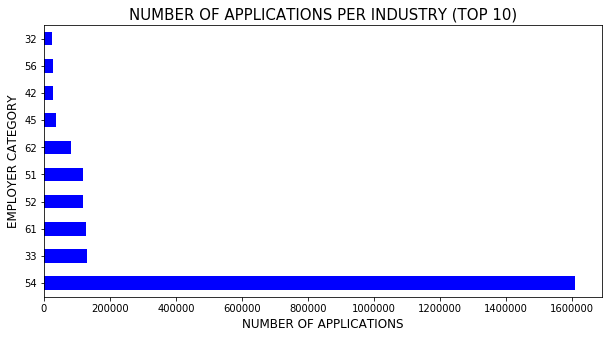

In [238]:
plot_status_topsoc= df_sub_2['EMPLOYER_CAT'].value_counts().head(10).plot.barh(color = 'blue', figsize = (10, 5))
plot_status_topsoc.set_title('NUMBER OF APPLICATIONS PER INDUSTRY (TOP 10)', fontsize=15)
plot_status_topsoc.set_ylabel("EMPLOYER CATEGORY", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF APPLICATIONS", fontsize=12)
plot_status_topsoc
print(df_sub_2['EMPLOYER_CAT'].value_counts().head(10))

### <u>Notes:</u>
#### -Plotted a graph to see how the distribution of the petitions look when grouped by the employer category. Evidently, most of the applications are under category 54 (Professional, Scientific, and Technical Services).

Here are some categories as specified by the government:

    11	Agriculture, Forestry, Fishing and Hunting
    21	Mining
    22	Utilities
    23	Construction
    31-33	Manufacturing
    42	Wholesale Trade
    44-45	Retail Trade
    48-49	Transportation and Warehousing
    51	Information
    52	Finance and Insurance
    53	Real Estate Rental and Leasing
    54	Professional, Scientific, and Technical Services
    55	Management of Companies and Enterprises
    56	Administrative and Support and Waste Management and Remediation Services
    61	Educational Services
    62	Health Care and Social Assistance
    71	Arts, Entertainment, and Recreation
    72	Accommodation and Food Services
    81	Other Services (except Public Administration)
    92	Public Administration

#### Visualizing the categories to determine if there is a difference in certified/denied for each one. 

54    16006
61     2584
62     2582
33     2127
51     1677
52     1647
42      868
23      604
56      584
45      438
Name: EMPLOYER_CAT, dtype: int64


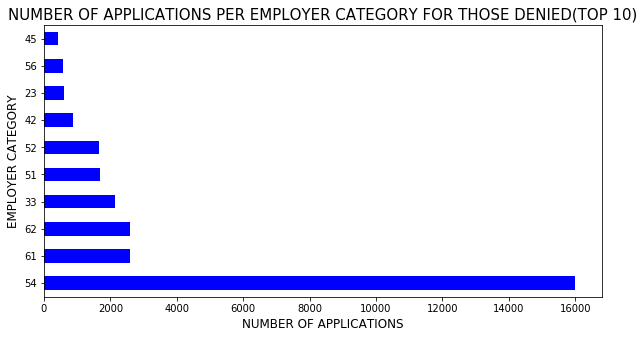

In [239]:
plot_status_topsoc= df_sub_2[df_sub_2['CASE_STATUS']=='DENIED'].EMPLOYER_CAT.value_counts().head(10).plot.barh(color = 'blue', figsize = (10, 5))
plot_status_topsoc.set_title('NUMBER OF APPLICATIONS PER EMPLOYER CATEGORY FOR THOSE DENIED(TOP 10)', fontsize=15)
plot_status_topsoc.set_ylabel("EMPLOYER CATEGORY", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF APPLICATIONS", fontsize=12)
plot_status_topsoc
print(df_sub_2[df_sub_2['CASE_STATUS']=='DENIED'].EMPLOYER_CAT.value_counts().head(10))

Even within the denied portion of the case status column, we continue to see that the industry "Professional, Scientific, and Technical Services" continues to dominate. Indicating similar distribution between accepted and denied by industry.

3    784262
0    722633
2    520144
1    376811
4      3548
Name: EmployerRegion, dtype: int64


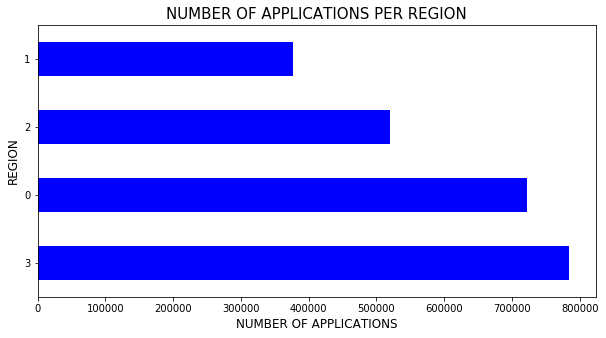

In [240]:
plot_status_topsoc= df_sub_2['EmployerRegion'].value_counts().head(4).plot.barh(color = 'blue', figsize = (10, 5))
plot_status_topsoc.set_title('NUMBER OF APPLICATIONS PER REGION', fontsize=15)
plot_status_topsoc.set_ylabel("REGION", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF APPLICATIONS", fontsize=12)
plot_status_topsoc
print(df_sub_2['EmployerRegion'].value_counts().head(10))

54    16006
61     2584
62     2582
33     2127
51     1677
52     1647
42      868
23      604
56      584
45      438
Name: EMPLOYER_CAT, dtype: int64


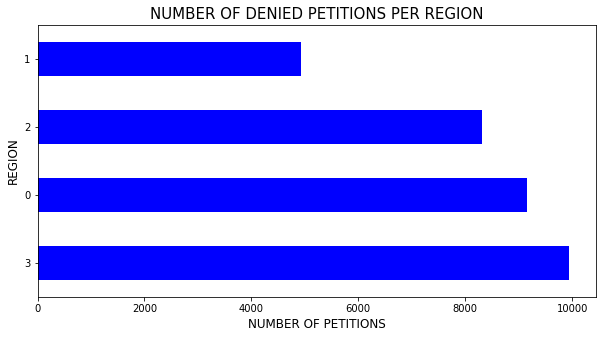

In [241]:
plot_status_topsoc= df_sub_2[df_sub_2['CASE_STATUS']=='DENIED'].EmployerRegion.value_counts().head(4).plot.barh(color = 'blue', figsize = (10, 5))
plot_status_topsoc.set_title('NUMBER OF DENIED PETITIONS PER REGION', fontsize=15)
plot_status_topsoc.set_ylabel("REGION", fontsize=12)
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS", fontsize=12)
plot_status_topsoc
print(df_sub_2[df_sub_2['CASE_STATUS']=='DENIED'].EMPLOYER_CAT.value_counts().head(10))

### <u>Notes:</u>
#### -All of the percentages for the regions are pretty similar, indicating that there seems to not be any sort sort of preference based on region

In [242]:
pd.crosstab(df_sub_2['CASE_STATUS'], df_sub_2['EmployerRegion'], normalize = 'columns')

EmployerRegion,0,1,2,3,4
CASE_STATUS,,,,,
CERTIFIED,0.987326,0.986898,0.98401,0.987323,0.92221
DENIED,0.012674,0.013102,0.01599,0.012677,0.07779


In [243]:
pd.crosstab(df_sub_2['CASE_STATUS'], df_sub_2['WorksiteRegion'], normalize = 'columns')

WorksiteRegion,0,1,2,3,4
CASE_STATUS,,,,,
CERTIFIED,0.986739,0.987732,0.986065,0.986105,0.920392
DENIED,0.013261,0.012268,0.013935,0.013895,0.079608


### <u>Notes:</u>
#### -Interestingly enough, it looks like the largest submitter of H1-B applications also has one of the lowest denied rates at around 1%. 

In [244]:
TotalCases = pd.crosstab(df_sub_2['EMPLOYER_CAT'], df_sub_2['CASE_STATUS'], margins = True)

In [245]:
TotalCases = TotalCases.sort_values(by = ['CERTIFIED'], ascending = False)

In [246]:
TotalCases = TotalCases.iloc[1:68,2]

In [247]:
EmployerDeniedRate = pd.crosstab(df_sub_2['EMPLOYER_CAT'], df_sub_2['CASE_STATUS'], normalize = 'index', margins = True)

In [248]:
EmployerDeniedRate['TotalCases'] = TotalCases
#since they both have a row index, this lines up properly without having to sort EmployerDeniedRate

In [249]:
EmployerDeniedRate.sort_values(by = ['TotalCases'], ascending = False).head(20)

CASE_STATUS,CERTIFIED,DENIED,TotalCases
EMPLOYER_CAT,,,
54,0.990066,0.009934,1611160.0
33,0.983729,0.016271,130721.0
61,0.979809,0.020191,127979.0
52,0.986025,0.013975,117852.0
51,0.985747,0.014253,117656.0
62,0.968657,0.031343,82378.0
45,0.988448,0.011552,37914.0
42,0.969922,0.030078,28858.0
56,0.978368,0.021632,26997.0


### <u>Notes:</u>
#### -We also do a quick review of willfull violater

In [250]:
df_sub_2.head()

,CASE_STATUS,EMPLOYER_COUNTRY,SOC_NAME,TOTAL_WORKERS,FULL_TIME_POSITION,PW_WAGE_SOURCE,PW_WAGE_SOURCE_YEAR,H1B_DEPENDENT,WILLFUL_VIOLATOR,YEARLY_WAGE,EMPLOYER_CAT,EmployerRegion,WorksiteRegion,NO_APPS,NO_APPS_Bin,NO_APPS_cde,ISTRUMP
0,CERTIFIED,UNITED STATES OF AMERICA,"ENGINEERING TEACHERS, POSTSECONDARY",1.0,Y,Other,2014.0,N,N,42860.0,61,3,3,314,"(50.0, 317.0]",1,0
1,CERTIFIED,UNITED STATES OF AMERICA,"FOREIGN LANGUAGE AND LITERATURE TEACHERS,",1.0,Y,Other,2012.0,N,N,38910.0,61,3,3,314,"(50.0, 317.0]",1,0
2,CERTIFIED,UNITED STATES OF AMERICA,"ENGINEERING TEACHERS, POSTSECONDARY",1.0,Y,Other,2014.0,N,N,42868.8,61,3,3,314,"(50.0, 317.0]",1,0
3,CERTIFIED,UNITED STATES OF AMERICA,BIOCHEMISTS AND BIOPHYSICISTS,1.0,Y,Other,2014.0,N,N,37794.0,61,3,3,314,"(50.0, 317.0]",1,0
4,CERTIFIED,UNITED STATES OF AMERICA,"ENGINEERING TEACHERS, POSTSECONDARY",1.0,Y,Other,2014.0,N,N,42868.8,61,3,3,314,"(50.0, 317.0]",1,0


In [251]:
pd.crosstab(df_sub_2['CASE_STATUS'], df_sub_2['WILLFUL_VIOLATOR'])

WILLFUL_VIOLATOR,N,Y
CASE_STATUS,,
CERTIFIED,2372274,2493
DENIED,32577,54


In [252]:
pd.crosstab(df_sub_2['CASE_STATUS'], df_sub_2['WILLFUL_VIOLATOR'], normalize = 'columns')

WILLFUL_VIOLATOR,N,Y
CASE_STATUS,,
CERTIFIED,0.986454,0.978799
DENIED,0.013546,0.021201


In [253]:
pd.crosstab(df_sub_2['CASE_STATUS'], df_sub_2['NO_APPS_cde'], normalize = 'columns')

NO_APPS_cde,0,1,2,3
CASE_STATUS,,,,
CERTIFIED,0.969164,0.990232,0.991333,0.99518
DENIED,0.030836,0.009768,0.008667,0.00482


In [254]:
df_sub_2.TOTAL_WORKERS.unique()

array([  1.,   2.,  50.,  10.,  20.,   5.,   6.,   3.,  18.,   4.,  11.,
         7.,  64.,   9.,   8.,  19.,  28.,  15.,  14.,  33.,  23.,  36.,
        12.,  17.,  13.,  34.,  30.,  22.,  26.,  16.,  43.,  51.,  32.,
        25.,  27.,  44.,  54.,  24.,  69.,  21.,  38.,  40.,  68.,  61.,
        45.,  62.,  60.,  39.,  65.,  29.,  41.,  48.,  37.,  70.,  35.,
        59.,  42.,  57.,  58.,  80.,  46., 105.,  31.,  52., 100.,  75.,
        72., 200.,  99., 150., 155., 115., 142., 101., 300., 125.,  56.,
        55., 180.,  53., 110.,  76.,  90., 169., 140.])

In [255]:
del [df_15_h1b, df_15_h1b_cert, df_16_h1b, df_16_h1b_cert, df_17_h1b, df_17_h1b_cert, 
     df_17_sub_otherCountry, df_18_h1b, df_18_h1b_cert, emp, percent_1, percent_2, missing_data, missing_values_count, my_list,
    type1, type2, type3, type4, type5, worksiteRegion, count15, count16, count17, count18, region, df_sub]

In [256]:
who

AdaBoostClassifier	 BaggingClassifier	 DBSCAN	 DecisionTreeClassifier	 EmployerDeniedRate	 GaussianNB	 GradientBoostingClassifier	 GridSearchCV	 KNeighborsClassifier	 
LabelEncoder	 LinearSVC	 LogisticRegression	 PCA	 Perceptron	 Pipeline	 RandomForestClassifier	 RandomizedSearchCV	 Region	 
SGDClassifier	 SMOTE	 SVC	 StandardScaler	 TSNE	 TotalCases	 XGBClassifier	 accuracy_score	 array	 
assert_almost_equal	 assert_array_almost_equal	 assert_array_equal	 assert_equal	 assert_frame_equal	 assert_is_instance	 assert_is_not	 check_random_state	 class_le	 
classification_report	 cols	 confusion_matrix_log	 confusion_matrix_log_bal	 confusion_matrix_log_smote	 confusion_matrix_log_weight	 conv	 cv	 data_scaled	 
datasets	 datetime	 df	 df_sub_2	 explained_variance	 gsc	 inauguration	 linkage	 load_digits	 
metrics	 model_log	 model_log_bal	 model_log_smote	 model_log_weight	 mpl	 np	 pca_df	 pca_f	 
pd	 pipeline_smote	 plot_confusion_matrix	 plot_decision_regions	 plot_status_numberinit	 

## F. Model Selection & Fitting : <a name="model"></a>

### - Data Pre-processing for Modeling:<a name="preprocess"></a>

### - Label Encoder (LE)<a name="labencoder"></a>

### <u>Notes:</u>
#### -For the features we are planning to use for our models, we converted them into numeric values using the Label Encoder. Then, we dropped all the original features, which most were categorical.

In [257]:
conv = preprocessing.LabelEncoder()

df_sub_2['EMPLOYER_COUNTRY_LE'] = conv.fit_transform(df_sub_2['EMPLOYER_COUNTRY'].values) # 31 categories
df_sub_2['SOC_NAME_LE'] = conv.fit_transform(df_sub_2['SOC_NAME'].values) #
df_sub_2['FULL_TIME_POSITION_LE'] = conv.fit_transform(df_sub_2['FULL_TIME_POSITION'].values) #
df_sub_2['H1B_DEPENDENT_LE'] = conv.fit_transform(df_sub_2['H1B_DEPENDENT'].values) #
df_sub_2['WILLFUL_VIOLATOR_LE'] = conv.fit_transform(df_sub_2['WILLFUL_VIOLATOR'].values) #
df_sub_2['EMPLOYER_CAT_LE'] = conv.fit_transform(df_sub_2['EMPLOYER_CAT'].values) #
df_sub_2['CASE_STATUS_LE'] = conv.fit_transform(df_sub_2['CASE_STATUS'].values) #
df_sub_2['PW_WAGE_SOURCE_LE'] = conv.fit_transform(df_sub_2['PW_WAGE_SOURCE'].values) #
#df_sub_2['WAGE_CATEGORY_LE'] = conv.fit_transform(df_sub_2['WAGE_CATEGORY'].values) #Decided not to use it

In [258]:
df_sub_2.head()

,CASE_STATUS,EMPLOYER_COUNTRY,SOC_NAME,TOTAL_WORKERS,FULL_TIME_POSITION,PW_WAGE_SOURCE,PW_WAGE_SOURCE_YEAR,H1B_DEPENDENT,WILLFUL_VIOLATOR,YEARLY_WAGE,...,NO_APPS_cde,ISTRUMP,EMPLOYER_COUNTRY_LE,SOC_NAME_LE,FULL_TIME_POSITION_LE,H1B_DEPENDENT_LE,WILLFUL_VIOLATOR_LE,EMPLOYER_CAT_LE,CASE_STATUS_LE,PW_WAGE_SOURCE_LE
0,CERTIFIED,UNITED STATES OF AMERICA,"ENGINEERING TEACHERS, POSTSECONDARY",1.0,Y,Other,2014.0,N,N,42860.0,...,1,0,4,563,1,0,0,47,0,5
1,CERTIFIED,UNITED STATES OF AMERICA,"FOREIGN LANGUAGE AND LITERATURE TEACHERS,",1.0,Y,Other,2012.0,N,N,38910.0,...,1,0,4,681,1,0,0,47,0,5
2,CERTIFIED,UNITED STATES OF AMERICA,"ENGINEERING TEACHERS, POSTSECONDARY",1.0,Y,Other,2014.0,N,N,42868.8,...,1,0,4,563,1,0,0,47,0,5
3,CERTIFIED,UNITED STATES OF AMERICA,BIOCHEMISTS AND BIOPHYSICISTS,1.0,Y,Other,2014.0,N,N,37794.0,...,1,0,4,123,1,0,0,47,0,5
4,CERTIFIED,UNITED STATES OF AMERICA,"ENGINEERING TEACHERS, POSTSECONDARY",1.0,Y,Other,2014.0,N,N,42868.8,...,1,0,4,563,1,0,0,47,0,5


In [259]:
#drop original text variables
df_sub_2=df_sub_2.drop(['EMPLOYER_COUNTRY'], axis=1)
df_sub_2=df_sub_2.drop(['SOC_NAME'], axis=1)
df_sub_2=df_sub_2.drop(['FULL_TIME_POSITION'], axis=1)
df_sub_2=df_sub_2.drop(['H1B_DEPENDENT'], axis=1)
df_sub_2=df_sub_2.drop(['WILLFUL_VIOLATOR'], axis=1)
df_sub_2=df_sub_2.drop(['CASE_STATUS'], axis=1)
df_sub_2=df_sub_2.drop(['PW_WAGE_SOURCE'], axis=1)
df_sub_2=df_sub_2.drop(['EMPLOYER_CAT'], axis=1)
df_sub_2=df_sub_2.drop(['NO_APPS'], axis=1)
df_sub_2=df_sub_2.drop(['NO_APPS_Bin'], axis=1)
df_sub_2=df_sub_2.drop(['PW_WAGE_SOURCE_YEAR'], axis=1)
#df_sub_2=df_sub_2.drop(['YEARLY_WAGE'], axis=1)
#df_sub_2=df_sub_2.drop(['WAGE_CATEGORY'], axis=1)

In [260]:
df_sub_2.head()

,TOTAL_WORKERS,YEARLY_WAGE,EmployerRegion,WorksiteRegion,NO_APPS_cde,ISTRUMP,EMPLOYER_COUNTRY_LE,SOC_NAME_LE,FULL_TIME_POSITION_LE,H1B_DEPENDENT_LE,WILLFUL_VIOLATOR_LE,EMPLOYER_CAT_LE,CASE_STATUS_LE,PW_WAGE_SOURCE_LE
0,1.0,42860.0,3,3,1,0,4,563,1,0,0,47,0,5
1,1.0,38910.0,3,3,1,0,4,681,1,0,0,47,0,5
2,1.0,42868.8,3,3,1,0,4,563,1,0,0,47,0,5
3,1.0,37794.0,3,3,1,0,4,123,1,0,0,47,0,5
4,1.0,42868.8,3,3,1,0,4,563,1,0,0,47,0,5


In [261]:
df_sub_2.dtypes

TOTAL_WORKERS            float64
YEARLY_WAGE              float64
EmployerRegion             int64
WorksiteRegion             int64
NO_APPS_cde                int32
ISTRUMP                    int64
EMPLOYER_COUNTRY_LE        int32
SOC_NAME_LE                int32
FULL_TIME_POSITION_LE      int32
H1B_DEPENDENT_LE           int32
WILLFUL_VIOLATOR_LE        int32
EMPLOYER_CAT_LE            int32
CASE_STATUS_LE             int32
PW_WAGE_SOURCE_LE          int32
dtype: object

### - The Models:<a name="models"></a>

In [262]:
# Separate input features (X) and target variable (y)
y = df_sub_2.CASE_STATUS_LE
x = df_sub_2.drop('CASE_STATUS_LE', axis=1)

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

### PCA for feature selection

#### From the code below doesn't appear that any of the features are significant differences between features. No feature dominates our dataset, so we will proceeed with all of them

In [264]:
# normalize data
df = x_train
data_scaled = pd.DataFrame(preprocessing.scale(x_train),columns = df.columns) 

# PCA
pca_f = PCA(n_components=13)
pca_f.fit_transform(data_scaled)

# Dump components relations with features:
explained_variance = pca_f.explained_variance_ratio_ 
print(explained_variance, '\n')
print (pd.DataFrame(pca_f.components_,columns=data_scaled.columns,index = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 
                                                                'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'
                                                                , 'PC-11', 'PC-12', 'PC-13']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.12126648 0.11479482 0.08821132 0.08291338 0.07913052 0.0770568
 0.07692926 0.0753453  0.07119721 0.06709646 0.06218185 0.0446012
 0.03927541] 

       TOTAL_WORKERS  YEARLY_WAGE  EmployerRegion  WorksiteRegion  \
PC-1        0.220445    -0.009657        0.128567        0.101859   
PC-2        0.087824     0.005340       -0.689425       -0.691977   
PC-3        0.432705     0.048270       -0.044937       -0.015421   
PC-4        0.344428    -0.042646        0.051673        0.038177   
PC-5        0.316381    -0.035748       -0.034689        0.005217   
PC-6        0.049753    -0.053211       -0.021966        0.007350   
PC-7        0.043527     0.981180        0.011236        0.024999   
PC-8       -0.096850     0.167441       -0.052463       -0.059801   
PC-9        0.607421    -0.027291       -0.018654        0.078867   
PC-10      -0.158200     0.004848        0.004935       -0.026807   
PC-11       0.251628    -0.006125       -0.002048        0.090187   
PC-12       0.246786     

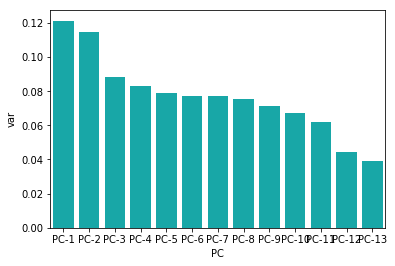

In [265]:
#plot the data
pca_df = pd.DataFrame({'var':pca_f.explained_variance_ratio_,
             'PC':['PC-1', 'PC-2', 'PC-3', 'PC-4','PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10','PC-11','PC-12', 'PC-13']})
sns.barplot(x='PC',y="var",data=pca_df, color="c");

### - Logistic Regression<a name="logreg"></a>

###### Trump/Obama Years

Let's explore whether or not there was a significant difference in the final two years of Obama's presidency (15/16) and 
first two years of Trump's presidency (17/18). 

### <u>Notes:</u>
#### -No noticable difference between the Obama/Trump years.  It seems that there wasn't a substantial regulatory shift in terms of application criteria between these years.  Let's proceed with the complete, four year, database.

In [130]:
df_sub_2_obama = df_sub_2[df_sub_2['ISTRUMP']==0]
df_sub_2_trump = df_sub_2[df_sub_2['ISTRUMP']==1]
y_obama = df_sub_2_obama.CASE_STATUS_LE
x_obama = df_sub_2_obama.drop('CASE_STATUS_LE', axis=1)
y_trump = df_sub_2_trump.CASE_STATUS_LE
x_trump = df_sub_2_trump.drop('CASE_STATUS_LE', axis=1)

In [131]:
x_train_obama, x_test_obama, y_train_obama, y_test_obama = train_test_split(x_obama, y_obama, test_size=0.25, random_state = 0)
x_train_trump, x_test_trump, y_train_trump, y_test_trump = train_test_split(x_trump, y_trump, test_size=0.25, random_state = 0)

In [132]:
# Train model
#create the model
model_obama = LogisticRegression()

#fit model
model_obama.fit(x_train_obama, y_train_obama)

#create predictions based on model
y_pred_obama = model_obama.predict(x_test_obama)

# Train model
#create the model
model_trump = LogisticRegression(class_weight='balanced')

#fit model
model_trump.fit(x_train_trump, y_train_trump)

#create predictions based on model
y_pred_trump = model_trump.predict(x_test_trump)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
print(metrics.classification_report(y_test_obama, y_pred_obama)),
print(metrics.classification_report(y_test_trump, y_pred_trump))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    329793
           1       0.95      0.01      0.01      4924

   micro avg       0.99      0.99      0.99    334717
   macro avg       0.97      0.50      0.50    334717
weighted avg       0.98      0.99      0.98    334717

              precision    recall  f1-score   support

           0       0.99      0.53      0.69    263881
           1       0.01      0.44      0.02      3253

   micro avg       0.53      0.53      0.53    267134
   macro avg       0.50      0.49      0.36    267134
weighted avg       0.98      0.53      0.68    267134



In [134]:
del [df_sub_2_obama, df_sub_2_trump, y_obama, x_obama, y_trump, x_trump, 
     x_train_obama, x_test_obama, y_train_obama, y_test_obama,
    x_train_trump, x_test_trump, y_train_trump, y_test_trump, model_obama, y_pred_obama, model_trump, y_pred_trump]

#### We will proceed to run the logistic models on our final dataset with five different parameter sets: normal, balanced, manual weighting, grid optimized weights, and SMOTE. Our predictor is heavily skewed towards approved cases (~99%), because we are trying to predict denials.  We use different methods to improve the balance and learn best from the dataset

In [266]:
# Train model
#create the model
model_log = LogisticRegression()
model_log_bal = LogisticRegression(class_weight = 'balanced')
model_log_weight = LogisticRegression(class_weight = {0:1,1:2}, random_state=1)

resampling = SMOTE(kind='borderline2')
model_log_smote = LogisticRegression(class_weight = {0:1,1:2}, random_state=1)
pipeline_smote = Pipeline([('SMOTE', resampling), ('Logistic Regression', model_log_smote)])

#fit model
model_log.fit(x_train, y_train)
model_log_bal.fit(x_train, y_train)
model_log_weight.fit(x_train, y_train)
pipeline_smote.fit(x_train, y_train)

#create predictions based on model
y_pred_log = model_log.predict(x_test)
y_pred_log_bal = model_log_bal.predict(x_test)
y_pred_log_weight = model_log_weight.predict(x_test)
y_pred_log_smote = pipeline_smote.predict(x_test)

#create the confusion matrices
confusion_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
confusion_matrix_log_bal = metrics.confusion_matrix(y_test, y_pred_log_bal)
confusion_matrix_log_weight = metrics.confusion_matrix(y_test, y_pred_log_weight)
confusion_matrix_log_smote = metrics.confusion_matrix(y_test, y_pred_log_smote)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Additionally, We'll run a grid search to optimize the parameters for a logistic regression to see if we can improve the mode.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best parameters : {'class_weight': {0: 0.14210526315789473, 1: 0.8578947368421053}}


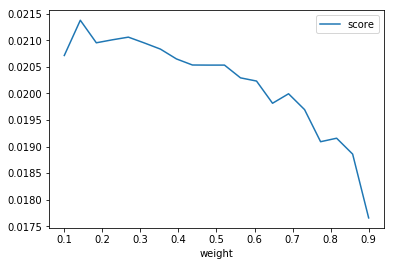

In [285]:
weights = np.linspace(0.90, 0.10, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(x, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
data = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data.plot(x='weight')

In [286]:
model_log_grid = LogisticRegression(**grid_result.best_params_)
model_log_grid.fit(x_train, y_train)
y_pred_grid = model_log_grid.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [290]:
#create the probabilities
probs_log = model_log.predict_proba(x_test)
probs_log = probs_log[:, 1]
probs_log_bal = model_log_bal.predict_proba(x_test)
probs_log_bal = probs_log_bal[:, 1]
probs_log_weight = model_log_weight.predict_proba(x_test)
probs_log_weight = probs_log_weight[:, 1]
probs_log_smote = pipeline_smote.predict_proba(x_test)
probs_log_smote = probs_log_smote[:, 1]
probs_log_grid = model_log_grid.predict_proba(x_test)
probs_log_grid = probs_log_grid[:, 1]

#create the summary statistics
precision_log, recall_log, _ = metrics.precision_recall_curve(y_test, probs_log)
precision_log_bal, recall_log_bal, _ = metrics.precision_recall_curve(y_test, probs_log_bal)
precision_log_weight, recall_log_weight, _ = metrics.precision_recall_curve(y_test, probs_log_weight)
precision_log_smote, recall_log_smote, _ = metrics.precision_recall_curve(y_test, probs_log_smote)
precision_log_grid, recall_log_grid, _ = metrics.precision_recall_curve(y_test, probs_log_grid)

In [291]:
print("Regular Logistic Regression", '\n',metrics.classification_report(y_test, y_pred_log))
print("Balanced Logistic Regression", '\n',metrics.classification_report(y_test, y_pred_log_bal))
print("Manually Weighted Logistic Regression", '\n',metrics.classification_report(y_test, y_pred_log_weight))
print("Smote Logistic Regression", '\n',metrics.classification_report(y_test, y_pred_log_smote))
print("Logistic Regression With Optimized Paramters", '\n', metrics.classification_report(y_test, y_pred_grid))

Regular Logistic Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.99      0.01      0.02      8105

   micro avg       0.99      0.99      0.99    601850
   macro avg       0.99      0.51      0.51    601850
weighted avg       0.99      0.99      0.98    601850

Balanced Logistic Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    593745
           1       0.01      1.00      0.03      8105

   micro avg       0.01      0.01      0.01    601850
   macro avg       0.01      0.50      0.01    601850
weighted avg       0.00      0.01      0.00    601850

Manually Weighted Logistic Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.99      0.01      0.02      8105

   micro avg       0.99      0.99      0.99    601850
   macro avg       0.99    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Smote Logistic Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    593745
           1       0.01      1.00      0.03      8105

   micro avg       0.01      0.01      0.01    601850
   macro avg       0.01      0.50      0.01    601850
weighted avg       0.00      0.01      0.00    601850

Logistic Regression With Optimized Paramters 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.89      0.01      0.02      8105

   micro avg       0.99      0.99      0.99    601850
   macro avg       0.94      0.51      0.51    601850
weighted avg       0.99      0.99      0.98    601850



### <u>Notes:</u>
#### The logistic results were not very good based on the classification report. For example, the best recall we got on denials (1) was .01. Additionally, some of the models classified everything as a denial, achieving an inaccurate recall of 1. Below are some visual representations of the results for the different models.

Regular Logistic Regression AUC: 0.511


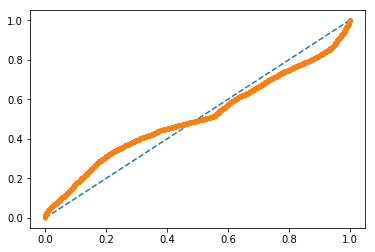

Balanced Logistic Regression AUC: 0.459


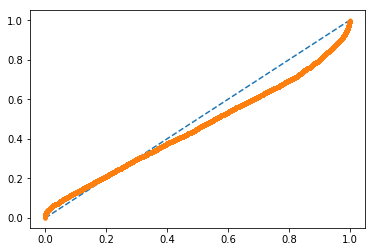

Manually Weighted Logistic RegressionAUC: 0.706


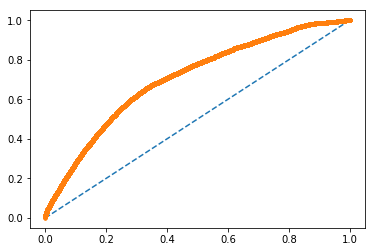

Smote Logistic Regression AUC: 0.504


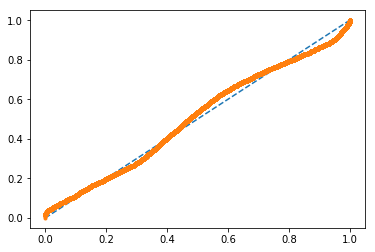

[0.60820639 0.6053147  0.71235338 ... 0.61565801 0.74912209 0.70474971]
Smote Logistic Regression AUC: 0.714


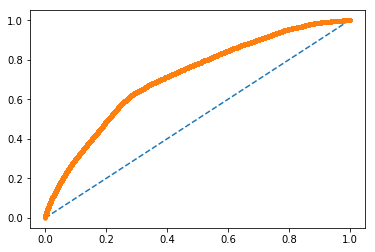

[0.1668576  0.07970946 0.07773331 ... 0.14807858 0.16293917 0.02801708]


In [292]:
# calculate normal logistic regression AUC
auc_log = roc_auc_score(y_test, probs_log)
print('Regular Logistic Regression AUC: %.3f' % auc_log)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_log)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate balanced logistic AUC
auc_log_bal = roc_auc_score(y_test, probs_log_bal)
print('Balanced Logistic Regression AUC: %.3f' % auc_log_bal)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_log_bal)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate weighted logistic AUC
auc_log_weight = roc_auc_score(y_test, probs_log_weight)
print('Manually Weighted Logistic RegressionAUC: %.3f' % auc_log_weight)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_log_weight)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate SMOTE logistic AUC
auc_log_smote = roc_auc_score(y_test, probs_log_smote)
print('Smote Logistic Regression AUC: %.3f' % auc_log_smote)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_log_smote)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
print(probs_log_smote)

# calculate grid optimized logistic AUC
auc_log_grid = roc_auc_score(y_test, probs_log_grid)
print('Smote Logistic Regression AUC: %.3f' % auc_log_grid)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_log_grid)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
print(probs_log_grid)

#### As seen above, the SMOTE and manually weighted models have the highest AUC scores, and best ROC curves. The other models had about 0.50, meaning they are no better thanrandom guessing. This is represented by the blue-dashed line.

Regular logistic


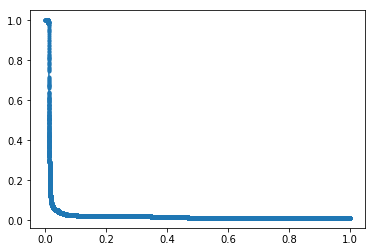

Balanced logistic


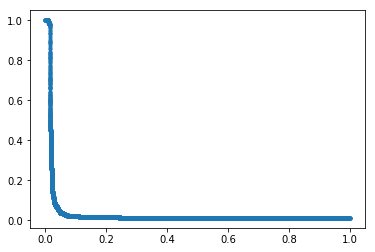

Weighted logistic


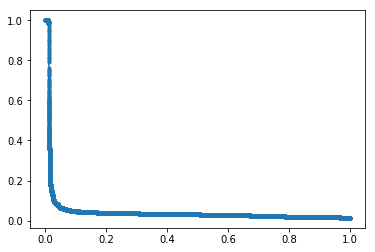

SMOTE logistic


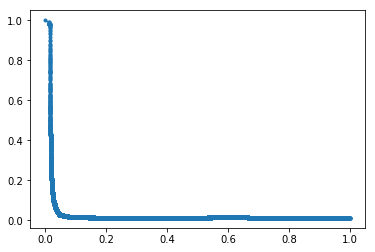

Grid optimized logistic


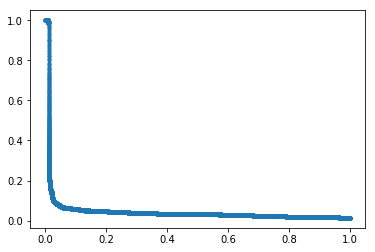

In [293]:
#regular logistic
plt.plot(recall_log, precision_log, marker='.')
print('Regular logistic')
plt.show()

#balanced logistic
plt.plot(recall_log_bal, precision_log_bal, marker='.')
print('Balanced logistic')
plt.show()

#weighted logistic
plt.plot(recall_log_weight, precision_log_weight, marker='.')
print('Weighted logistic')
plt.show()

#SMOTE logistic
plt.plot(recall_log_smote, precision_log_smote, marker='.')
print('SMOTE logistic')
plt.show()

#grid optimized logistic
plt.plot(recall_log_grid, precision_log_grid, marker='.')
print('Grid optimized logistic')
plt.show()

#### Above are the precision recall curves.  Our research indicates that with highly skewed datasets, ROC curves can be visually deceptive by presenting an optimistic interpretation of the model's predictive power.  Precision recall curves are a good alternative to verify that the ROC curve isn't deceiving us in our analysis.  The above verify that our ROC curves were indeed to optimistic for the manually weighted and SMOTE models because their precision recall curves are no better (or only marginally so) than the other models which had poor AUC scores and ROC curves.

### Decision Tree Classifier<a name="decisiontree"></a>

#### We will proceed to run the decision tree models on our final dataset with four different parameter sets: normal, balanced, manual weighting, and SMOTE. Our predictor is heavily skewed towards approved cases (~99%), because we are trying to predict denials.  We use different methods to improve the balance and learn best from the dataset

In [279]:
# Train model
#create the model
model_dec = DecisionTreeClassifier(min_samples_leaf = 0.2, max_depth = 500, random_state = 1)
model_dec_bal = DecisionTreeClassifier(class_weight = 'balanced', min_samples_leaf = 0.2, max_depth = 500, random_state = 1)
model_dec_weight = DecisionTreeClassifier(class_weight = {0:1,1:2}, min_samples_leaf = 0.2, max_depth = 500, random_state = 1)

resampling = SMOTE(kind='borderline2')
model_dec_smote = DecisionTreeClassifier(min_samples_leaf = 0.2, max_depth = 500, random_state = 1)
pipeline_dec_smote = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model_dec_smote)])

#fit model
model_dec.fit(x_train, y_train)
model_dec_bal.fit(x_train, y_train)
model_dec_weight.fit(x_train, y_train)
pipeline_dec_smote.fit(x_train, y_train) 

#create predictions based on model
y_pred_dec = model_dec.predict(x_test)
y_pred_dec_bal = model_dec_bal.predict(x_test)
y_pred_dec_weight = model_dec_weight.predict(x_test)
y_pred_dec_smote = pipeline_smote.predict(x_test)

#create the confusion matrices
confusion_matrix_dec = metrics.confusion_matrix(y_test, y_pred_dec)
confusion_matrix_dec_bal = metrics.confusion_matrix(y_test, y_pred_dec_bal)
confusion_matrix_dec_weight = metrics.confusion_matrix(y_test, y_pred_dec_weight)
confusion_matrix_dec_smote = metrics.confusion_matrix(y_test, y_pred_dec_smote)

In [280]:
#create the probabilities
probs_dec = model_dec.predict_proba(x_test)
probs_dec = probs_dec[:, 1]
probs_dec_bal = model_dec_bal.predict_proba(x_test)
probs_dec_bal = probs_dec_bal[:, 1]
probs_dec_weight = model_dec_weight.predict_proba(x_test)
probs_dec_weight = probs_dec_weight[:, 1]
probs_dec_smote = pipeline_dec_smote.predict_proba(x_test)
probs_dec_smote = probs_dec_smote[:, 1]

#create the summary statistics
precision_dec, recall_dec, _ = metrics.precision_recall_curve(y_test, probs_dec)
precision_dec_bal, recall_dec_bal, _ = metrics.precision_recall_curve(y_test, probs_dec_bal)
precision_dec_weight, recall_dec_weight, _ = metrics.precision_recall_curve(y_test, probs_dec_weight)
precision_dec_smote, recall_dec_smote, _ = metrics.precision_recall_curve(y_test, probs_dec_smote)

In [281]:
print("Regular Decision Tree", '\n',metrics.classification_report(y_test, y_pred_dec))
print("Balanced Decision Tree", '\n',metrics.classification_report(y_test, y_pred_dec_bal))
print("Manually Weighted Decision Tree", '\n',metrics.classification_report(y_test, y_pred_dec_weight))
print("Smote Decision Tree", '\n',metrics.classification_report(y_test, y_pred_dec_smote))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Regular Decision Tree 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.00      0.00      0.00      8105

   micro avg       0.99      0.99      0.99    601850
   macro avg       0.49      0.50      0.50    601850
weighted avg       0.97      0.99      0.98    601850

Balanced Decision Tree 
               precision    recall  f1-score   support

           0       0.99      0.75      0.86    593745
           1       0.03      0.58      0.06      8105

   micro avg       0.75      0.75      0.75    601850
   macro avg       0.51      0.66      0.46    601850
weighted avg       0.98      0.75      0.85    601850



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Manually Weighted Decision Tree 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.00      0.00      0.00      8105

   micro avg       0.99      0.99      0.99    601850
   macro avg       0.49      0.50      0.50    601850
weighted avg       0.97      0.99      0.98    601850

Smote Decision Tree 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    593745
           1       0.01      1.00      0.03      8105

   micro avg       0.01      0.01      0.01    601850
   macro avg       0.01      0.50      0.01    601850
weighted avg       0.00      0.01      0.00    601850



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### For decision trees, our "balanced" model, which has a 50-50 weight between the 0-1 prediction, was the only model with any predictive power.  It has a fairly good recall (58%) when lookning at the denials without sacrificing too much on certified recall (75%).  This might be our best model depending on the business use case.

Regular Decision Tree AUC: 0.691


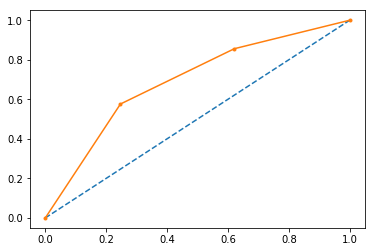

Balanced Decision Tree AUC: 0.691


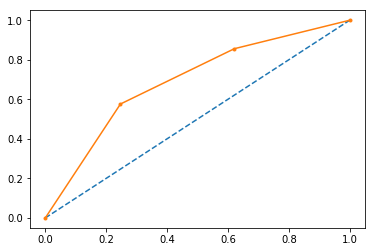

Manually Weighted Decisin Tree AUC: 0.691


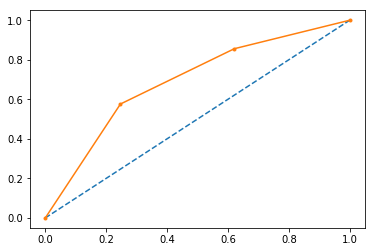

Smote Decision Tree AUC: 0.684


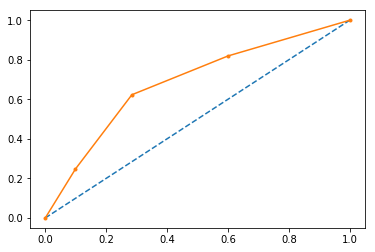

In [282]:
# calculate decision tree AUC
auc_dec = roc_auc_score(y_test, probs_dec)
print('Regular Decision Tree AUC: %.3f' % auc_dec)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_dec)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate balanced decision tree AUC
auc_dec_bal = roc_auc_score(y_test, probs_dec_bal)
print('Balanced Decision Tree AUC: %.3f' % auc_dec_bal)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_dec_bal)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate weighted decision tree AUC
auc_dec_weight = roc_auc_score(y_test, probs_dec_weight)
print('Manually Weighted Decisin Tree AUC: %.3f' % auc_dec_weight)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_dec_weight)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate SMOTE decision treeAUC
auc_dec_smote = roc_auc_score(y_test, probs_dec_smote)
print('Smote Decision Tree AUC: %.3f' % auc_dec_smote)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_dec_smote)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### The AUC scores and ROC curves all show that our decision curves are fairly good at predicting.

Regular Decision Tree


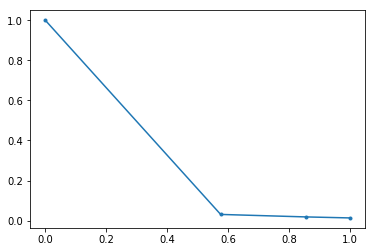

Balanced Decision Tree


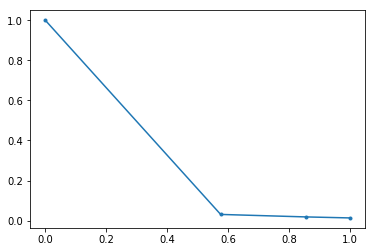

Weighted Decision Tree


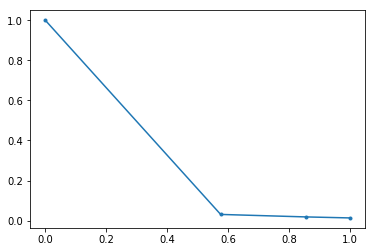

SMOTE Decision Tree


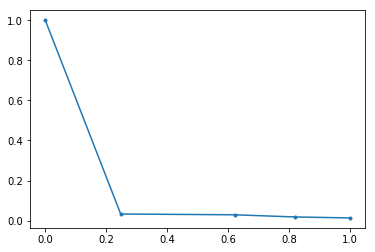

In [283]:
#regular Decision Tree
plt.plot(recall_dec, precision_dec, marker='.')
print('Regular Decision Tree')
plt.show()
#balanced Decision Tree
plt.plot(recall_dec_bal, precision_dec_bal, marker='.')
print('Balanced Decision Tree')
plt.show()
#weighted Decision Tree
plt.plot(recall_dec_weight, precision_dec_weight, marker='.')
print('Weighted Decision Tree')
plt.show()
#SMOTE Decision Tree
plt.plot(recall_dec_smote, precision_dec_smote, marker='.')
print('SMOTE Decision Tree')
plt.show()

#### The precision recall curves are much better for our decision trees than they were for the logistic regressions. However, this is where it is important to look at the classification reports and ROC curves.  Several of the models with decent precision recall curves, such as the normal, balanced and SMOTE trees actually had terrible denial recall.  Either they got no denial predictions wrong, or all right by classifying all applications as denials.

### - Random Forest<a name="randomforest"></a>

#### We will proceed to run the random forest models on our final dataset with four different parameter sets: normal, balanced, manual weighting, and SMOTE. Our predictor is heavily skewed towards approved cases (~99%), because we are trying to predict denials.  We use different methods to improve the balance and learn best from the dataset

In [273]:
# Train model
#create the model
model_for = RandomForestClassifier(n_estimators=100, random_state=1)
model_for_bal = RandomForestClassifier(class_weight = 'balanced', n_estimators=100, random_state=1)
model_for_weight = RandomForestClassifier(class_weight = {0:1,1:2}, n_estimators=100, random_state=1)

resampling = SMOTE(kind='borderline2')
model_for_smote = RandomForestClassifier(class_weight = {0:1,1:2}, n_estimators=100, random_state=1)
pipeline_for_smote = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model_for_smote)])

#fit model
model_for.fit(x_train, y_train)
model_for_bal.fit(x_train, y_train)
model_for_weight.fit(x_train, y_train)
pipeline_for_smote.fit(x_train, y_train) 

#create predictions based on model
y_pred_for = model_for.predict(x_test)
y_pred_for_bal = model_for_bal.predict(x_test)
y_pred_for_weight = model_for_weight.predict(x_test)
y_pred_for_smote = pipeline_for_smote.predict(x_test)

#create the confusion matrices
confusion_matrix_for = metrics.confusion_matrix(y_test, y_pred_for)
confusion_matrix_for_bal = metrics.confusion_matrix(y_test, y_pred_for_bal)
confusion_matrix_for_weight = metrics.confusion_matrix(y_test, y_pred_for_weight)
confusion_matrix_for_smote = metrics.confusion_matrix(y_test, y_pred_for_smote)

In [274]:
#create the probabilities
probs_for = model_for.predict_proba(x_test)
probs_for = probs_for[:, 1]
probs_for_bal = model_for_bal.predict_proba(x_test)
probs_for_bal = probs_for_bal[:, 1]
probs_for_weight = model_for_weight.predict_proba(x_test)
probs_for_weight = probs_for_weight[:, 1]
probs_for_smote = pipeline_for_smote.predict_proba(x_test)
probs_for_smote = probs_for_smote[:, 1]

#create the summary statistics
precision_for, recall_for, _ = metrics.precision_recall_curve(y_test, probs_for)
precision_for_bal, recall_for_bal, _ = metrics.precision_recall_curve(y_test, probs_for_bal)
precision_for_weight, recall_for_weight, _ = metrics.precision_recall_curve(y_test, probs_for_weight)
precision_for_smote, recall_for_smote, _ = metrics.precision_recall_curve(y_test, probs_for_smote)

In [275]:
print("Regular Random Forest", '\n',metrics.classification_report(y_test, y_pred_for))
print("Balanced Weight Random Forest",'\n',metrics.classification_report(y_test, y_pred_for_bal))
print("Manual Weight Random Forest",'\n',metrics.classification_report(y_test, y_pred_for_weight))
print("Smote Random Forest",'\n',metrics.classification_report(y_test, y_pred_for_smote))

Regular Random Forest 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.21      0.08      0.12      8105

   micro avg       0.98      0.98      0.98    601850
   macro avg       0.60      0.54      0.55    601850
weighted avg       0.98      0.98      0.98    601850

Balanced Weight Random Forest 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    593745
           1       0.06      0.20      0.10      8105

   micro avg       0.95      0.95      0.95    601850
   macro avg       0.53      0.58      0.53    601850
weighted avg       0.98      0.95      0.96    601850

Manual Weight Random Forest 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    593745
           1       0.21      0.10      0.14      8105

   micro avg       0.98      0.98      0.98    601850
   macro avg       0.60      0.55      0.5

#### Our random forests were our best models are average in that all of them had the highest denial recall, while maintaining a near perfect approval recall.  However, even these had a fairly low recall for denials (0.1-0.2).  If the business wants to ensure that there are no mistakes in predicting approvals as well as denials, these are probably the best models to use.

AUC for Regular Random Forest: 0.668


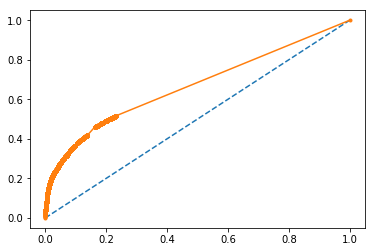

AUC for Balanced Random Forest: 0.652


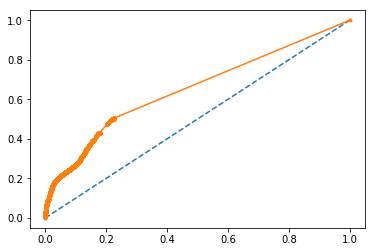

AUC for Manual Weight Random Forest: 0.666


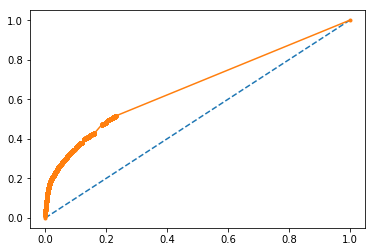

AUC for Smote Random Forest: 0.667


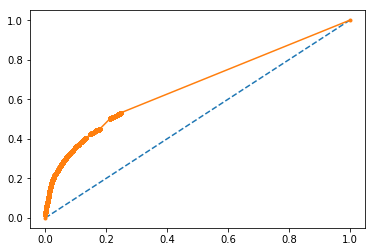

In [276]:
# calculate random forest AUC
auc_for = roc_auc_score(y_test, probs_for)
print('AUC for Regular Random Forest: %.3f' % auc_for)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_for)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate balanced random forest AUC
auc_for_bal = roc_auc_score(y_test, probs_for_bal)
print('AUC for Balanced Random Forest: %.3f' % auc_for_bal)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_for_bal)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate weighted random forest AUC
auc_for_weight = roc_auc_score(y_test, probs_for_weight)
print('AUC for Manual Weight Random Forest: %.3f' % auc_for_weight)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_for_weight)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate SMOTE random forestAUC
auc_for_smote = roc_auc_score(y_test, probs_for_smote)
print('AUC for Smote Random Forest: %.3f' % auc_for_smote)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_for_smote)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Our AUC scores and ROC curves for the forests were all fairly good, though interestingly slightly worse than the decision trees, despite the fact that the forests had higher recalls and precision.

Regular Decision Tree


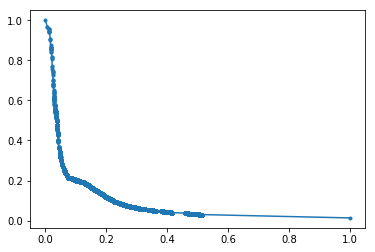

Balanced Decision Tree


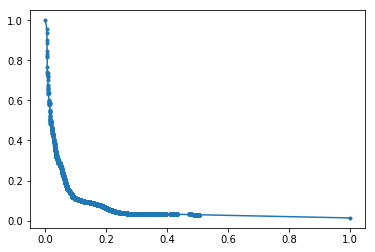

Weighted Decision Tree


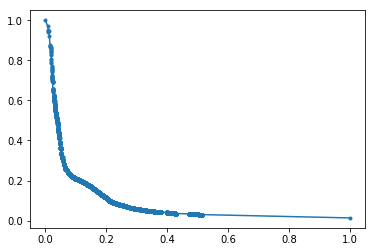

SMOTE Decision Tree


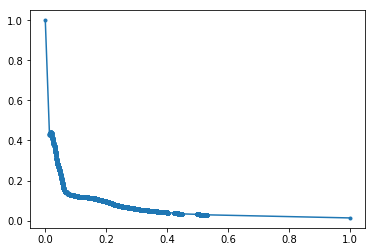

In [314]:
#regular Random Forest
plt.plot(recall_for, precision_for, marker='.')
print('Regular Decision Tree')
plt.show()
#balanced Random Forest
plt.plot(recall_for_bal, precision_for_bal, marker='.')
print('Balanced Decision Tree')
plt.show()
#weighted Random Forest
plt.plot(recall_for_weight, precision_for_weight, marker='.')
print('Weighted Decision Tree')
plt.show()
#SMOTE Random Forest
plt.plot(recall_for_smote, precision_for_smote, marker='.')
print('SMOTE Decision Tree')
plt.show()

#### Our random forest precision recall curves were better than our logistic regressions, though slightly worse than the decision trees.  Our theory is that the learning trees created by the random forest might have inadvertently undersampled the denials.

### Random Forest - Additional Wage Bins Analysis

#### We decided to perform additional analysis with a random forest by incorporating a new "wage category" variable that bins the wages, which our breakdown below indicates was the most important feature.

In [ ]:
# For WAGE_CATEGORY_LE

#model_for_weight = RandomForestClassifier(class_weight = {0:1,1:2}, n_estimators=100, random_state=1)
#model_for_weight.fit(x_train, y_train)
#y_pred_for_weight = model_for_weight.predict(x_test)

In [ ]:
#probs_for_weight = model_for_weight.predict_proba(x_test)
#probs_for_weight = probs_for_weight[:, 1]
#precision_for, recall_for, _ = metrics.precision_recall_curve(y_test, probs_for_weight)
#print("Manually Weighted Random Forest", '\n',metrics.classification_report(y_test, y_pred_for_weight))

Manually Weighted Random Forest 
              precision    recall  f1-score   support

          0       0.99      1.00      0.99    593725
          1       0.20      0.05      0.08      8125

avg / total       0.98      0.98      0.98    601850

#### It looks like the wage bins actually made the forest results worse.  Our denial recall dropped to 0.5, where with previous models we were getting a denial recall of 0.1-0.2 <u>Notes:</u>

### - XGBoost<a name="xgboost"></a>

#### Let's try XGBoost with grid search to optimize our parameters.

In [294]:
X_train_encode = pd.get_dummies(x_train)
X_test_encode = pd.get_dummies(x_test)
train_X = X_train_encode.as_matrix()
train_y = y_train.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [295]:
gbm=xgboost.XGBClassifier(max_features='sqrt', subsample=0.8, random_state=10)

In [296]:
parameters = [{'n_estimators': [5, 30]}, {'learning_rate': [0.1, 0.01, 0.5]}]

In [297]:
grid_search = GridSearchCV(estimator = gbm, param_grid = parameters, scoring='accuracy', cv = 3, n_jobs=-1)

In [298]:
grid_search = grid_search.fit(train_X, train_y)

In [299]:
warnings.filterwarnings("ignore")
grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.5}, 0.9866312055951988)

In [300]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, max_features='sqrt', min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [301]:
gbm=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, max_features='sqrt', min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8).fit(train_X, train_y)

In [302]:
y_pred_boost = gbm.predict(X_test_encode.as_matrix())

In [303]:
print('XGboost & parameter optimization')
print(classification_report(y_test, y_pred_boost))

XGboost & parameter optimization
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    593745
           1       0.73      0.03      0.05      8105

   micro avg       0.99      0.99      0.99    601850
   macro avg       0.86      0.51      0.52    601850
weighted avg       0.98      0.99      0.98    601850



#### The XGboost was not noticeably better in the classification report than our other models.  It most closely resembles the logistic outputs, which had a very high recall on the certified applications but little recall on the denials. <u>Notes:</u>


### One-Class SVM<a name="OneClassSVM"></a>

#### We also wanted to run One-Class SVM to see if it would improve our predictions in comparison to our other models

In [327]:
sample_df = df_sub_2.groupby('CASE_STATUS_LE').apply(lambda x: x.sample(frac=0.05)).reset_index(drop=True)

sample_df.loc[sample_df['CASE_STATUS_LE'] == 0, "certified"] = 0  
sample_df.loc[sample_df['CASE_STATUS_LE'] != 0, "certified"] = 1

target = sample_df['certified']

In [328]:
outliers = target[target == 1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

outliers.shape (1632,)
outlier fraction 0.013558195563678658


In [329]:
sample_df.drop(["CASE_STATUS_LE", "certified"], axis=1, inplace=True)

In [330]:
train_data, test_data, train_target, test_target = train_test_split(sample_df, target, train_size = 0.8)  
train_data.shape 

(96296, 13)

In [331]:
# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

nu 0.013558195563678658


In [332]:
model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
model.fit(train_data)  

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
      max_iter=-1, nu=0.013558195563678658, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [333]:
preds = model.predict(test_data)  
targs = test_target

In [334]:
#print("accuracy: ", metrics.accuracy_score(targs, preds))  
#print("precision: ", metrics.precision_score(targs, preds))  
#print("recall: ", metrics.recall_score(targs, preds))  
#print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))  
print(metrics.classification_report(targs, preds))

area under curve (auc):  0.42541952352934115
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     23794
         1.0       0.01      0.69      0.02       280

   micro avg       0.01      0.01      0.01     24074
   macro avg       0.00      0.23      0.01     24074
weighted avg       0.00      0.01      0.00     24074



#### The One-Class SVM wasn't good in predicting the denials.  It had the same problem that some of our logistic models had, in that it classified most cases as denials.

#### After running numerous models, it looks like random forest is giving us our best results. Thus, we are going to move forward with random forest and tweak our model to see if we can get better results 

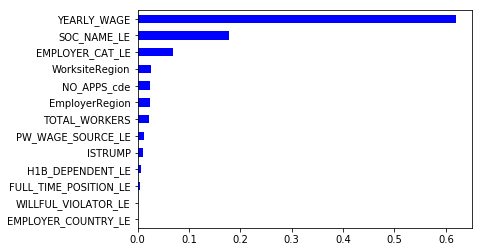

In [304]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_random_forest = pd.Series(model_for_weight.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_random_forest = importances_random_forest.sort_values()
# Make a horizontal bar plot
sorted_importances_random_forest.plot(kind='barh', color='blue')
plt.show()

In [307]:
model_for_weight = RandomForestClassifier(class_weight = {0:1,1:2}, n_estimators=100, random_state=1)
model_for_weight.fit(x_train, y_train)
y_pred_for_weight = model_for_weight.predict(x_test)

In [305]:
from sklearn.metrics import mean_squared_error as MSE

# Compute mse_dt
mse_dt = MSE(y_test, y_pred_for_weight)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.13


In [308]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(model_for_weight, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.13


In [309]:
y_pred_for_weight_train = model_for_weight.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_for_weight_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.09


#### The lower RMSE on our train relative to the CV RMSE suggests we might have an overfitting issue with the random forest.  


#### - Given that we might have some overfitting, we're going to rerun the forest with a lower number of estimators to see if we can correct for this. <u>Notes:</u>

In [310]:
model_for_weight = RandomForestClassifier(class_weight = {0:1,1:2}, n_estimators=40, random_state=1)
model_for_weight.fit(x_train, y_train)
y_pred_for_weight = model_for_weight.predict(x_test)

In [311]:
from sklearn.metrics import mean_squared_error as MSE

# Compute mse_dt
mse_dt = MSE(y_test, y_pred_for_weight)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.13


In [312]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(model_for_weight, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.13


In [313]:
y_pred_for_weight_train = model_for_weight.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_for_weight_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.09


#### Reducing the estimators did not have an impact on the RMSE, so it might be that we still have too many estimators, or that we need to do additional analysis of our models

## Conclusions<a name="conclusion"></a>

#### In terms of best model/model selection, we believe the balanced decision tree and the balanced random forest were the best models, though they have different use cases.  If the business wants to implement an automated tool to determine if an applicant is worth the money/opportunity cost then the random forest is best because it is very likely to correctly identify approvals while also getting some denials correct.  However, if the business is looking for the models to provide just another datapoint in a broader talent discussion, then the balanced decision tree is best because knowing the denial possibility is more important than knowing the certified possibility.  

#### We will do a variety of things for future study.  One such strategy is to do additional feature engineering with more interaction terms.  Also, we explore clustering further, beyond our Trump/Obama and binning examples.  The size of our data made our initial clustering attempts fail.  Even on small subsets (100,000 observations) we had issues using t-SNE for clustering.  